# Machine Learning

In this notebook we will explore different Machine Learning models to predict the maximum amount of days played by a player to assess the player retention.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import math as mt
import klib
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Dropout
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
data = pd.read_csv('ironhack_jj_dataset_0.csv')
data.shape

(280177, 92)

In [3]:
data.head(20)

,user_pseudo_id,m1_mission_completed,m1_mission_id,m1_mission_difficulty,m1_mission_stars_collected,m1_day_auto_increment,m1_lifetime_played_runs,m1_max_run_distance,m1_total_purchases_virtual,user_pseudo_id_1,...,m10_mission_completed,m10_mission_id,m10_mission_difficulty,m10_mission_stars_collected,m10_day_auto_increment,m10_lifetime_played_runs,m10_max_run_distance,m10_total_purchases_virtual,user_pseudo_id_10,target_max_day_played
0,01B372C9CC3945EFA229BDB15B59E788,3.0,Mission113,1.0,3.0,0.0,2.0,1537.0,0.0,01B372C9CC3945EFA229BDB15B59E788,...,12,Mission12,2,14,0.0,6.0,3226.0,0.0,01B372C9CC3945EFA229BDB15B59E788,5
1,0462b777c07ada96a55afaa23acc740b,3.0,Mission115,1.0,3.0,0.0,1.0,1298.0,0.0,0462b777c07ada96a55afaa23acc740b,...,12,Mission66,1,14,0.0,12.0,3913.0,4000.0,0462b777c07ada96a55afaa23acc740b,10
2,09d9f5f2eeaf06b61572ad6bb470b5f6,3.0,Mission115,1.0,3.0,0.0,1.0,1300.0,0.0,09d9f5f2eeaf06b61572ad6bb470b5f6,...,12,Mission6,1,15,0.0,12.0,2668.0,0.0,09d9f5f2eeaf06b61572ad6bb470b5f6,2
3,159f5fabb9a0e5a334ff350f00e3aa48,3.0,Mission113,1.0,3.0,0.0,1.0,1309.0,0.0,159f5fabb9a0e5a334ff350f00e3aa48,...,12,Mission19,2,14,0.0,9.0,2282.0,0.0,159f5fabb9a0e5a334ff350f00e3aa48,32
4,1d6ede0df37fbc44f1753ab1983c4ea5,3.0,Mission115,1.0,3.0,0.0,2.0,1358.0,0.0,1d6ede0df37fbc44f1753ab1983c4ea5,...,12,Mission12,2,14,1.0,18.0,4469.0,10000.0,1d6ede0df37fbc44f1753ab1983c4ea5,28
5,2b9e09f6209d51037cdd02de6fa9bca6,3.0,Mission115,1.0,3.0,0.0,1.0,1553.0,0.0,2b9e09f6209d51037cdd02de6fa9bca6,...,12,Mission86,2,14,2.0,10.0,2689.0,0.0,2b9e09f6209d51037cdd02de6fa9bca6,9
6,31FB9A0561414B9990B672FAEC9263A7,3.0,Mission109,1.0,3.0,1.0,1.0,1029.0,0.0,31FB9A0561414B9990B672FAEC9263A7,...,12,Mission7,1,15,3.0,20.0,5740.0,28000.0,31FB9A0561414B9990B672FAEC9263A7,3
7,4b486e167b40bd7c0bf78d5f853ffb66,3.0,Mission113,1.0,3.0,0.0,2.0,1996.0,4500.0,4b486e167b40bd7c0bf78d5f853ffb66,...,12,Mission12,2,12,1.0,6.0,3797.0,4500.0,4b486e167b40bd7c0bf78d5f853ffb66,9
8,4fb8fafcd5ddd80367db09f6c1095376,3.0,Mission94,2.0,3.0,0.0,2.0,1730.0,0.0,4fb8fafcd5ddd80367db09f6c1095376,...,12,Mission10,1,14,5.0,18.0,2665.0,0.0,4fb8fafcd5ddd80367db09f6c1095376,6
9,5CF7972C14574F6085064246423108EA,3.0,Mission115,1.0,3.0,0.0,1.0,1604.0,0.0,5CF7972C14574F6085064246423108EA,...,12,Mission6,1,15,2.0,12.0,5036.0,1000.0,5CF7972C14574F6085064246423108EA,2


## Data Cleaning and Exploration:

### Drop unnecessary columns:
  Column showing user ID is irrelevant for our purpose. As well as the column showing the daily increment. Unfortunately this column repeats over 10 times. 

In [4]:
data = data.drop(['user_pseudo_id', 'user_pseudo_id_1', 'user_pseudo_id_2', 'user_pseudo_id_3', 'user_pseudo_id_4', 'user_pseudo_id_5', 'user_pseudo_id_6', 'user_pseudo_id_7', 'user_pseudo_id_8', 'user_pseudo_id_9', 'user_pseudo_id_10',
'm1_day_auto_increment', 'm2_day_auto_increment', 'm3_day_auto_increment', 'm4_day_auto_increment', 'm5_day_auto_increment', 'm6_day_auto_increment', 'm7_day_auto_increment', 'm8_day_auto_increment', 'm9_day_auto_increment', 'm10_day_auto_increment'], axis=1)

## Dealing with Null Values:

In [5]:
def nulls_percent (df):
    
    '''
    Shows percent of nulls in a data frame.
    
    Args:
        df: The dataframe we want to check out.
        
    Returns:
        A new df with 2columns:
        - 'column_name' with the name of the original df columns
        - 'nulls_percentage' with the percentage of nulls in every column
    '''
    nulls_percent = pd.DataFrame(df.isna().sum()/len(df)).reset_index()
    nulls_percent.columns = ['column_name', 'nulls_percentage']
    
    return nulls_percent

In [6]:
#pd.set_option('display.max_rows', None)
nulls_percent(data)

,column_name,nulls_percentage
0,m1_mission_completed,0.064820
1,m1_mission_id,0.064820
2,m1_mission_difficulty,0.064820
3,m1_mission_stars_collected,0.064820
4,m1_lifetime_played_runs,0.067579
...,...,...
66,m10_mission_stars_collected,0.000000
67,m10_lifetime_played_runs,0.003209
68,m10_max_run_distance,0.003212
69,m10_total_purchases_virtual,0.003227


In [7]:
data = data.dropna()

There is not a significant amount of null values so I decide to remove all the rows that contain null values. In this case we already have a lot of data.abs

In [8]:
data.isnull().sum()

m1_mission_completed           0
m1_mission_id                  0
m1_mission_difficulty          0
m1_mission_stars_collected     0
m1_lifetime_played_runs        0
                              ..
m10_mission_stars_collected    0
m10_lifetime_played_runs       0
m10_max_run_distance           0
m10_total_purchases_virtual    0
target_max_day_played          0
Length: 71, dtype: int64

### Transforming Numerical discrete variables from Floats into Integers:
Most numerical columns appear as floats when they are discrete numericals, let's transform them into integers.


In [9]:
list_of_words = ['mission_completed', 'mission_difficulty', 'stars', 'lifetime_played']
for col in data.columns:
    for string in list_of_words:
        if string in col:
            data[col] = data[col].astype(np.int64)
            break #break is to stop looking for a the column once you've found it and start with the second one

### X - y split:
Since our goal is trying to predict the maximum amounts of days played by player in order to assess the user retention. For this reason we are going to keep **'target_max_day_played'** as our **dependent variable**.

In [10]:
X = data.drop(['target_max_day_played'], axis = 1)
y = data[['target_max_day_played']]

### Checking the Distribution of all the Numerical variables on X using Klib:

We can see below that the distribution for all those **Numerical Continuous** variables is **highly positively skewed**

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='m10_total_purchases_virtual', ylabel='Density'>

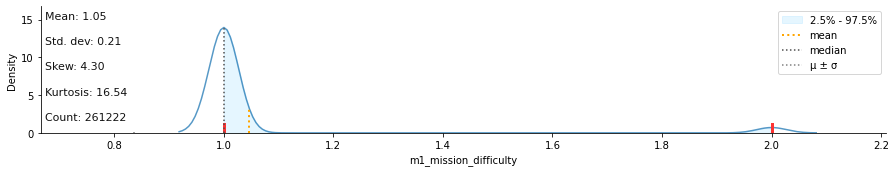

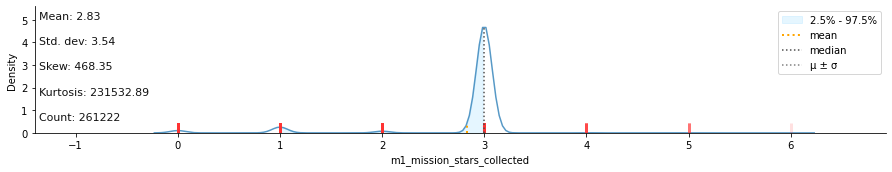

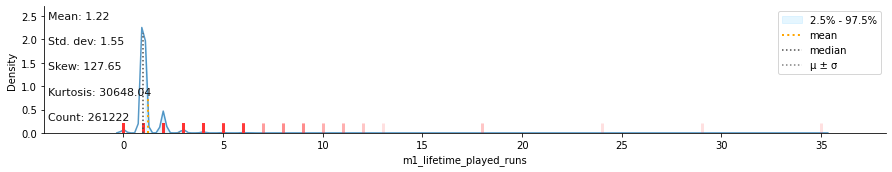

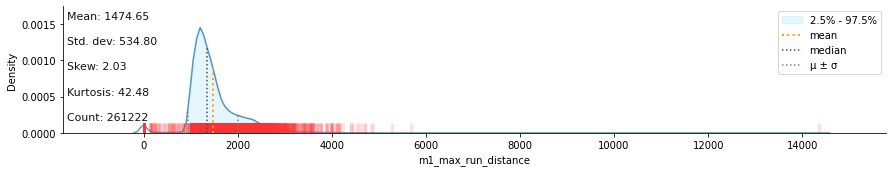

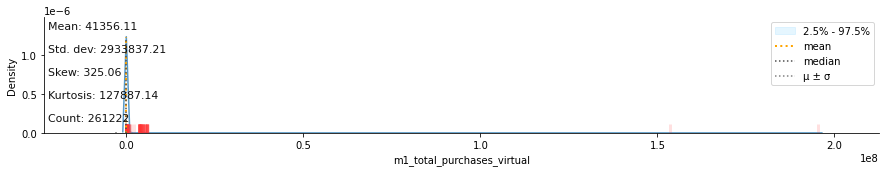

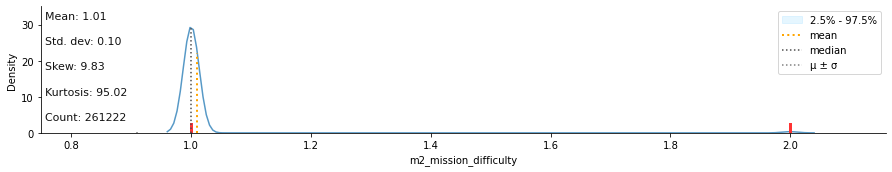

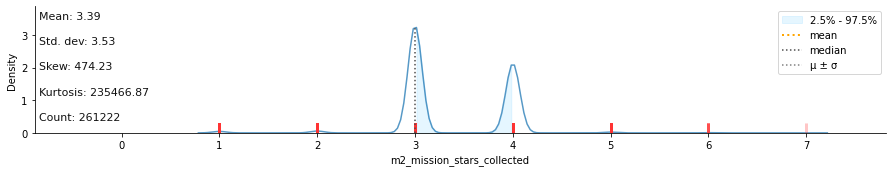

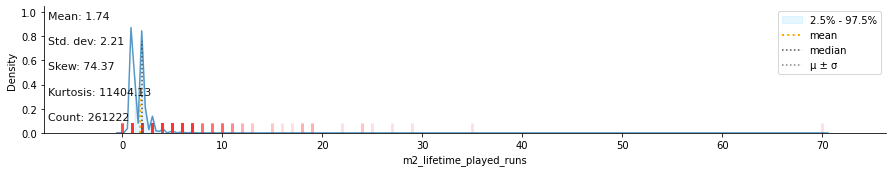

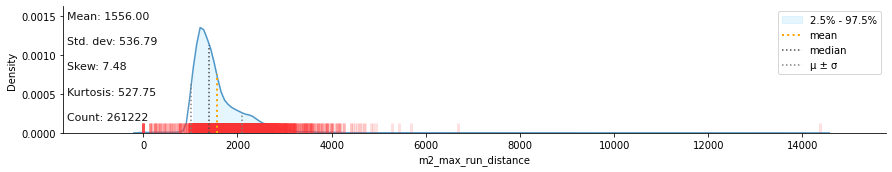

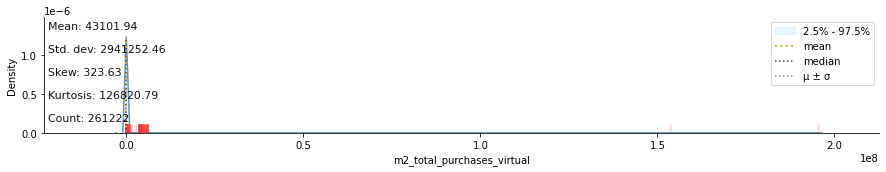

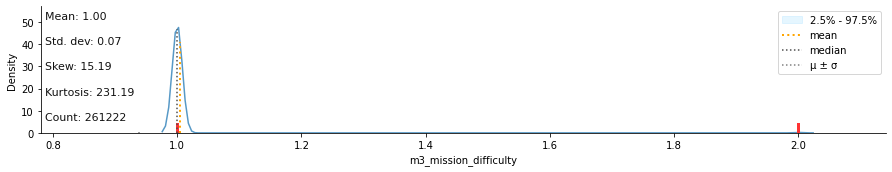

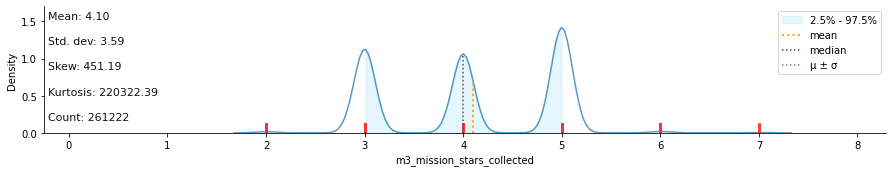

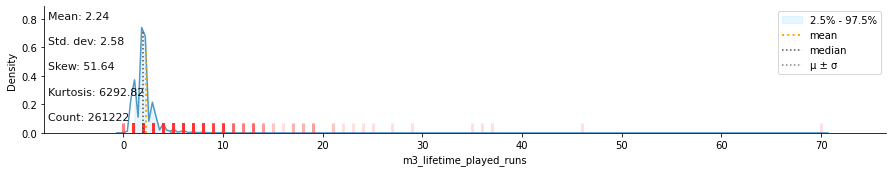

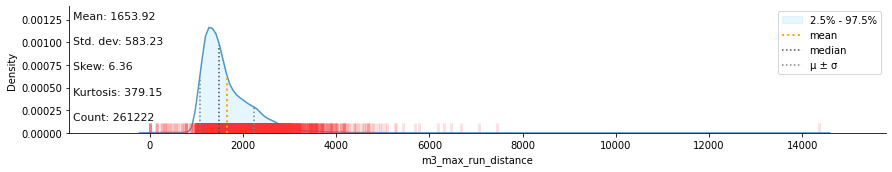

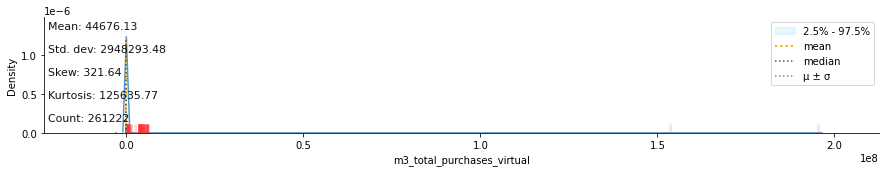

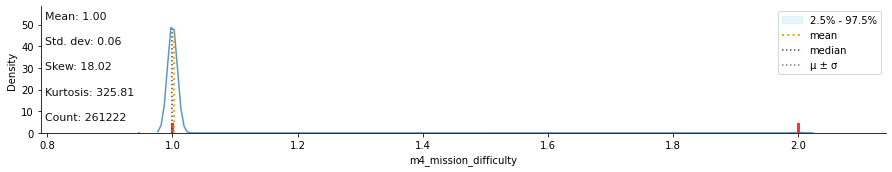

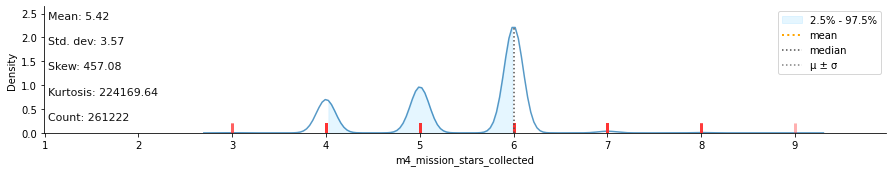

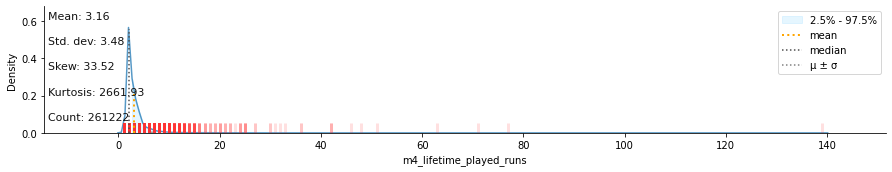

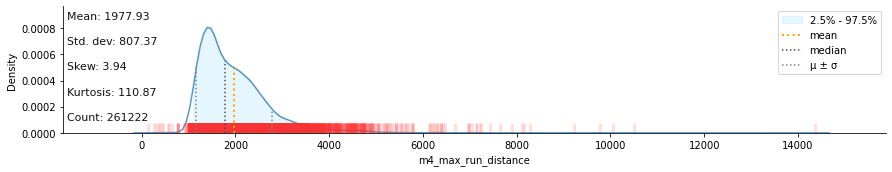

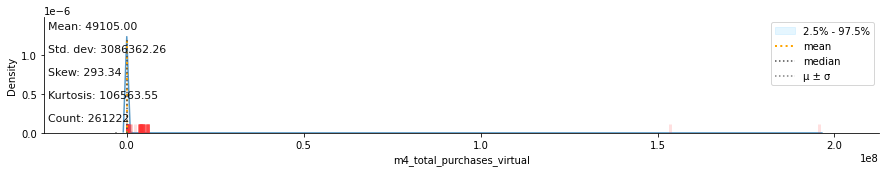

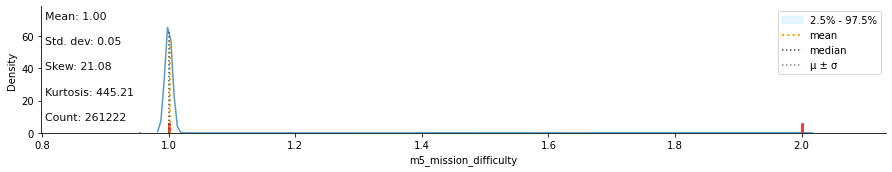

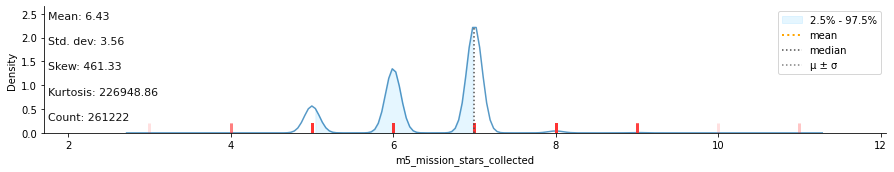

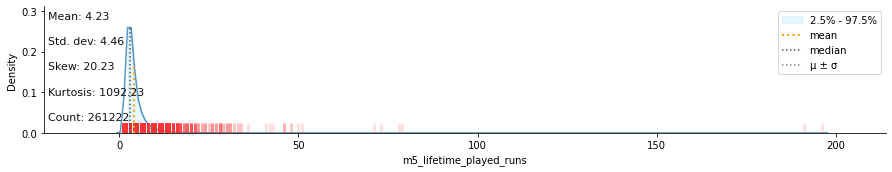

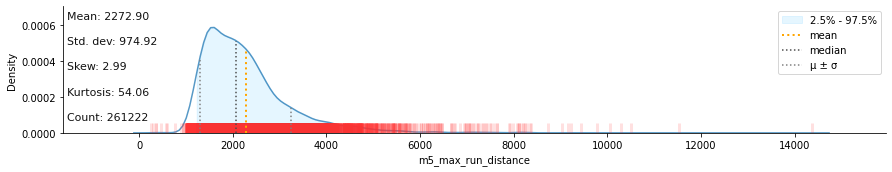

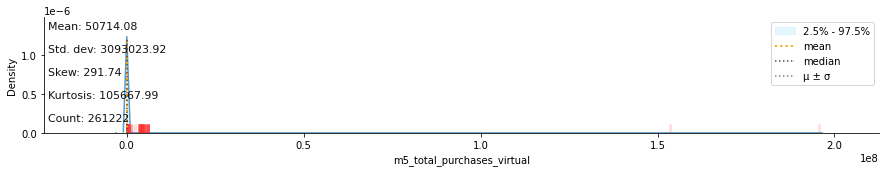

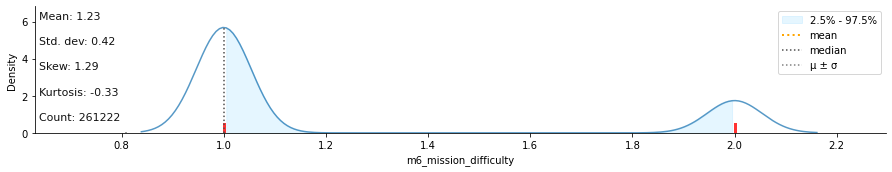

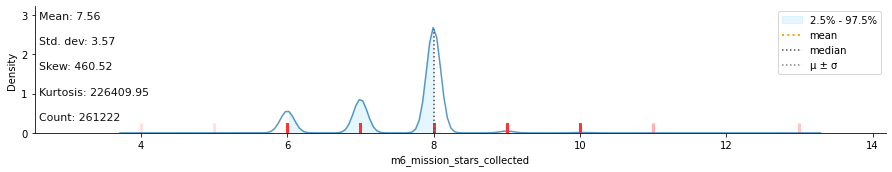

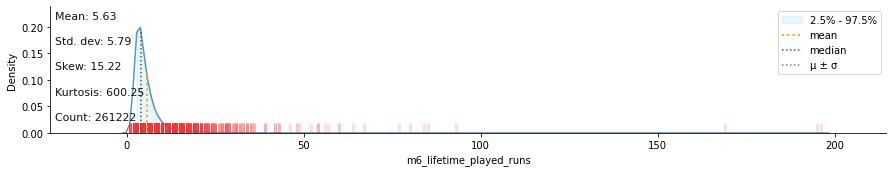

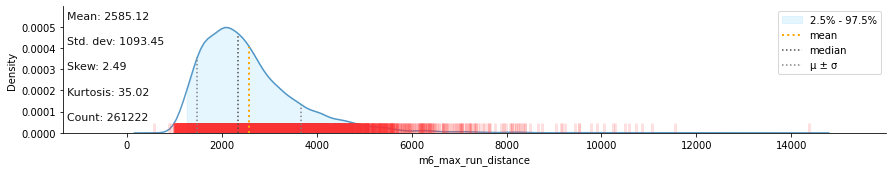

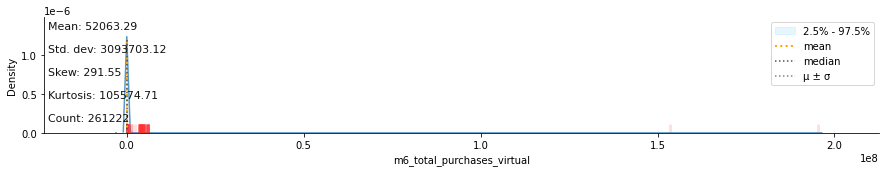

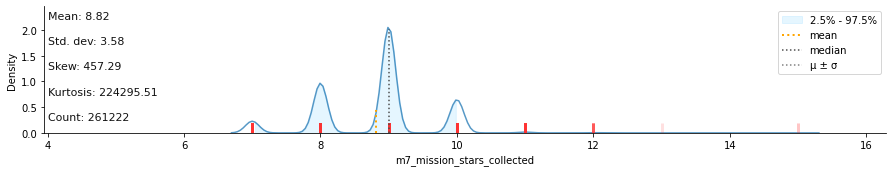

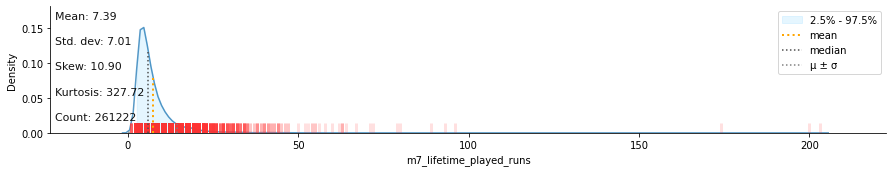

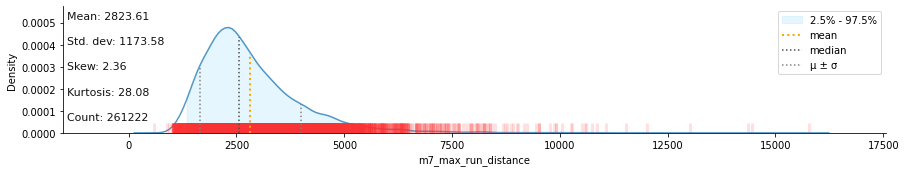

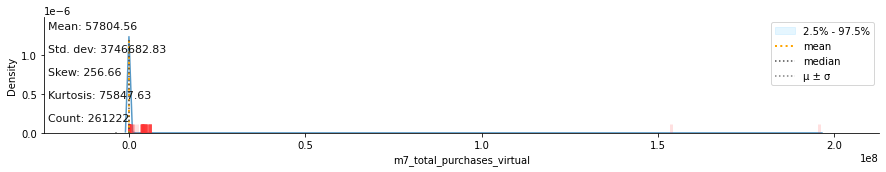

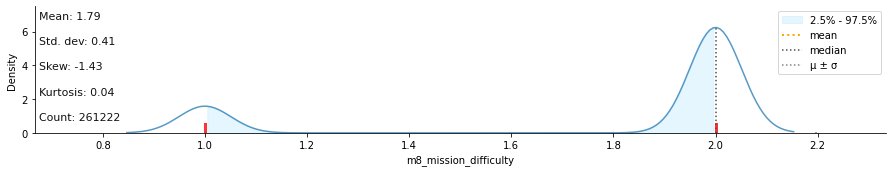

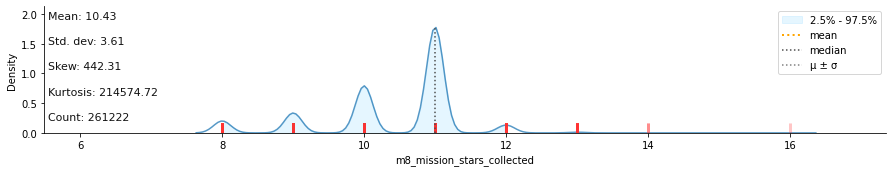

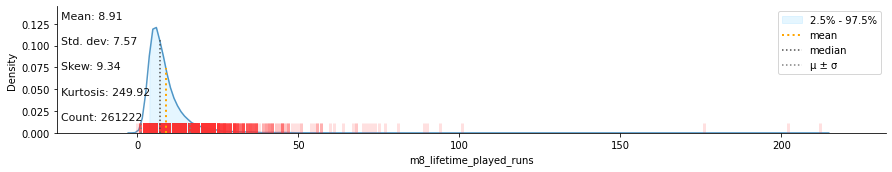

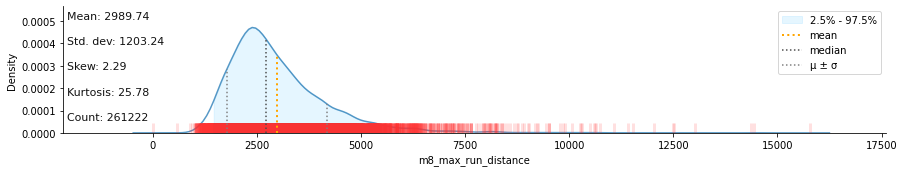

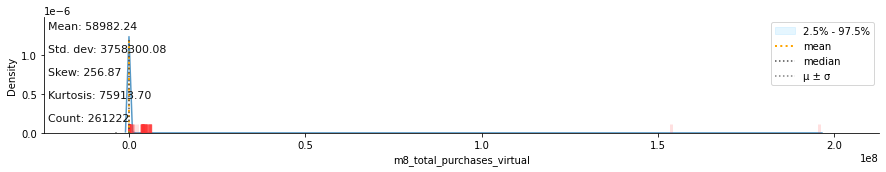

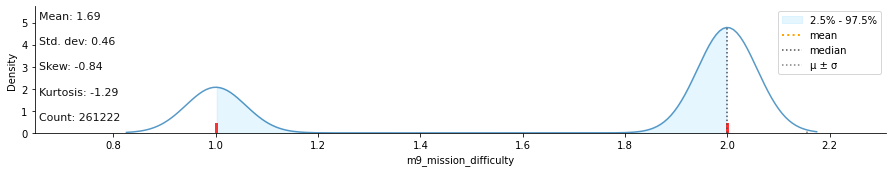

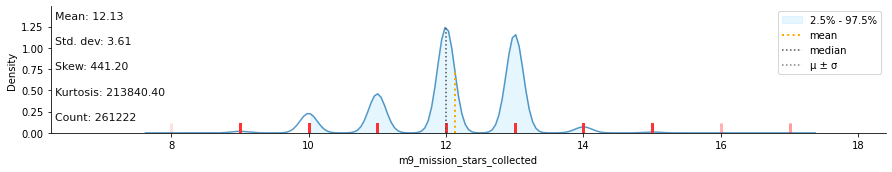

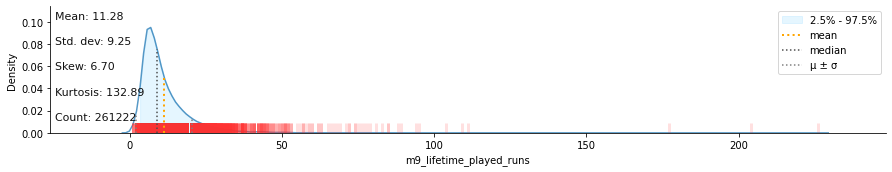

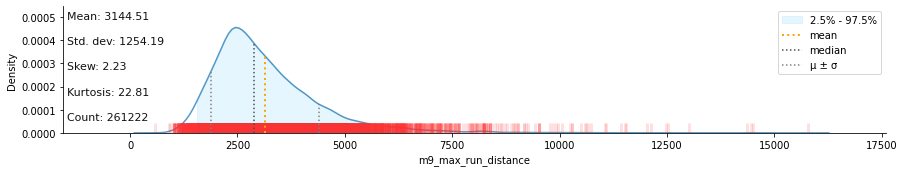

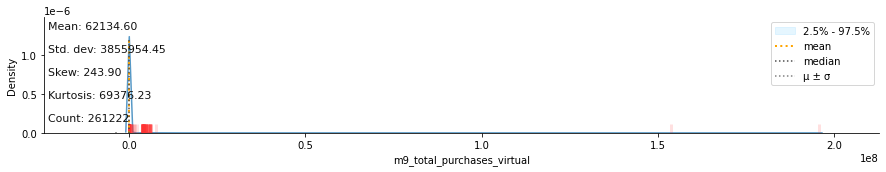

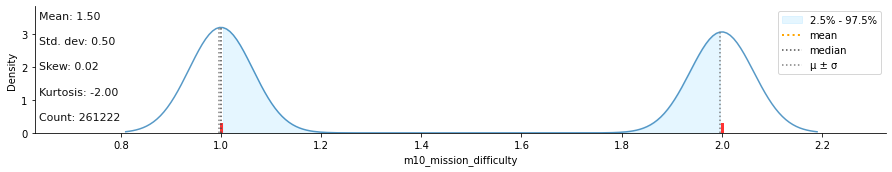

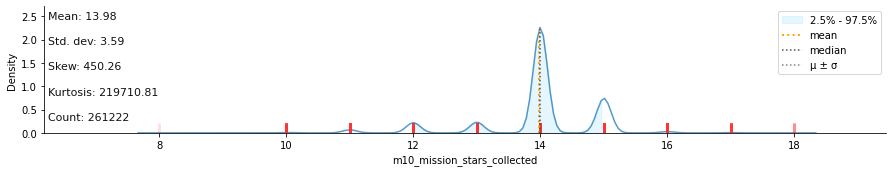

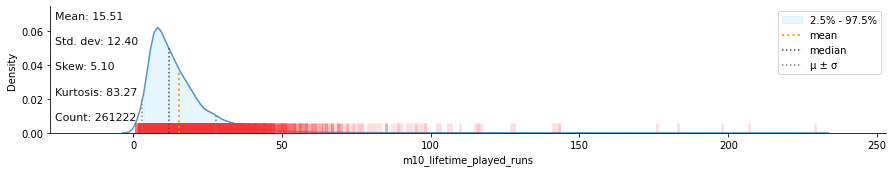

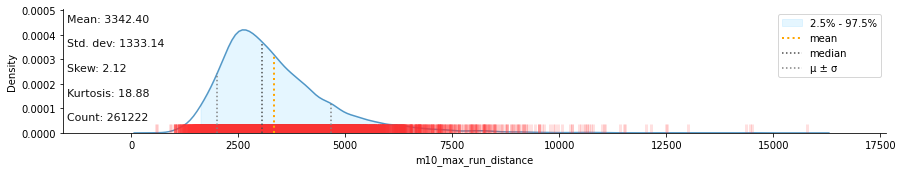

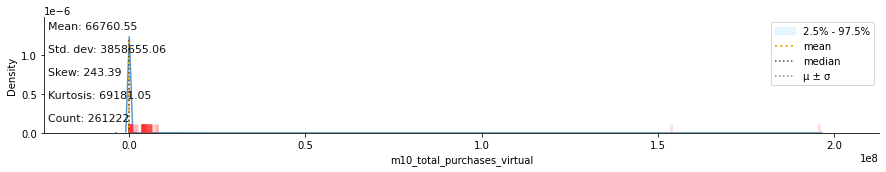

In [11]:
klib.dist_plot(X.select_dtypes(np.number), showall=True)

### Checking the Distribution on y:

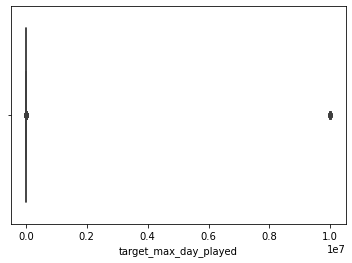

In [12]:
sns.boxplot(x = y['target_max_day_played'])
plt.show()

In [13]:
print(min(y['target_max_day_played']))
print(max(y['target_max_day_played']))

0
10000001


There seems to be an issue with how this data is registered, after some investigation we have encountered top values of 10M days played, which is impossible taking into consideration that the game was released on 2011. After some feedback with the client, we concluded to restrict the maximum amount of days to 7.

### Dealing with outliers on y:

Restricting the maximum value of the column to 7 days.

In [14]:
y = y[(y['target_max_day_played'] >=0) & ((y['target_max_day_played'] < 7)) ]
print(len(y))

186678


In [15]:
print(min(y['target_max_day_played']))
print(max(y['target_max_day_played']))

0
6


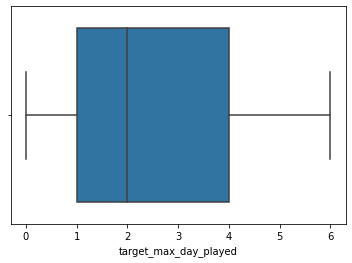

In [16]:
sns.boxplot(x = y['target_max_day_played'])
plt.show()

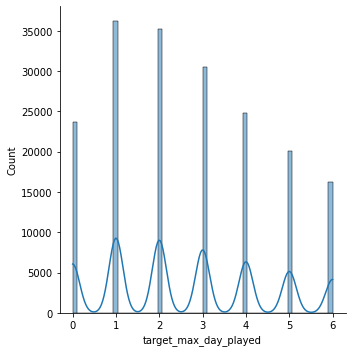

In [17]:
sns.displot(data=y, x = 'target_max_day_played', kde=True, rug=False)
plt.show()

Now the distribution looks quite Gaussian.

### Passing the indices of 'y' to X:

To avoid having issues when doing the Train-Test split we need to have the same indices on y and X.

In [18]:
#Getting the indices of y:

y_indices = y.index

#Passing the indices of y to X:

X = X.loc[y_indices]

## Train - Test Split:

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1233) 

#Transform NUMPY ARRAYS into dataframes
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df  = pd.DataFrame(X_test,columns=X.columns)

## Numerical and Categorical split:

In [22]:
X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)
X_test_cat = X_test.select_dtypes(object)

## Encoding Categorical features:

In [23]:
#Creating a list of lists of all the Unique values of the Categorical columns:
categories = [ list(data[col].unique()) for col in X_train_cat.columns ]
#categories

In [24]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', categories = categories)

#X_train:
encoder.fit(X_train_cat) 
X_train_cat_enc = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_train_cat_enc_df = pd.DataFrame(X_train_cat_enc, columns=cols, index = X_train_cat.index)
display(X_train_cat_enc_df.head())


#X_test:
X_test_cat_enc = encoder.transform(X_test_cat).toarray()
X_test_cat_enc_df = pd.DataFrame(X_test_cat_enc, columns=cols, index = X_test_cat.index )
display(X_test_cat_enc_df.head())

filename = "encoders/OneHotEncoder.pkl"
pickle.dump(encoder, open(filename, 'wb'))

,m1_mission_id_Mission115,m1_mission_id_Mission109,m1_mission_id_Mission94,m1_mission_id_Mission122,m1_mission_id_Dynamic273,m1_mission_id_Mission19,m1_mission_id_Dynamic105,m1_mission_id_Dynamic86,m1_mission_id_Dynamic290,m1_mission_id_Dynamic82,...,m10_mission_id_Dynamic205,m10_mission_id_Dynamic255,m10_mission_id_Dynamic273,m10_mission_id_Dynamic364,m10_mission_id_Mission72,m10_mission_id_Mission35,m10_mission_id_Dynamic99,m10_mission_id_Dynamic256,m10_mission_id_Dynamic156,m10_mission_id_Dynamic72
149640,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180779,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
222885,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30197,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
228513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,m1_mission_id_Mission115,m1_mission_id_Mission109,m1_mission_id_Mission94,m1_mission_id_Mission122,m1_mission_id_Dynamic273,m1_mission_id_Mission19,m1_mission_id_Dynamic105,m1_mission_id_Dynamic86,m1_mission_id_Dynamic290,m1_mission_id_Dynamic82,...,m10_mission_id_Dynamic205,m10_mission_id_Dynamic255,m10_mission_id_Dynamic273,m10_mission_id_Dynamic364,m10_mission_id_Mission72,m10_mission_id_Mission35,m10_mission_id_Dynamic99,m10_mission_id_Dynamic256,m10_mission_id_Dynamic156,m10_mission_id_Dynamic72
210607,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
178806,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126195,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Concatenating DataFrames before transformation

In [25]:
X_train_treated = pd.concat([X_train_cat_enc_df, X_train_num], axis =1)
X_test_treated = pd.concat([X_test_cat_enc_df, X_test_num], axis =1)

## Transforming Features:

Since most of the numerical variables have a skewed distribution, let's try to normalize it by applying a Quantile Transformer. We previously tried with Power Transformer but we had some issues.

In [26]:
from sklearn.preprocessing import QuantileTransformer

X_qtransform = QuantileTransformer()
X_qtransform.fit(X_train_treated.values)

#y_train:
X_train_qtrans = X_qtransform.transform(X_train_treated.values)
X_train_qtrans_df = pd.DataFrame( X_train_qtrans, columns = X_train_treated.columns, index = X_train_treated.index )
display(X_train_qtrans_df.head())

#y_test:
X_test_qtrans = X_qtransform.transform(X_test_treated.values)
X_test_qtrans_df = pd.DataFrame(X_test_qtrans, columns = X_test_treated.columns, index = X_test_treated.index )
display(X_test_qtrans_df.head())

#storing the transformer in a pickle file:
filename = "transformers/X_quantile_transformer.pkl"
pickle.dump(X_qtransform, open(filename, 'wb'))

,m1_mission_id_Mission115,m1_mission_id_Mission109,m1_mission_id_Mission94,m1_mission_id_Mission122,m1_mission_id_Dynamic273,m1_mission_id_Mission19,m1_mission_id_Dynamic105,m1_mission_id_Dynamic86,m1_mission_id_Dynamic290,m1_mission_id_Dynamic82,...,m9_mission_stars_collected,m9_lifetime_played_runs,m9_max_run_distance,m9_total_purchases_virtual,m10_mission_completed,m10_mission_difficulty,m10_mission_stars_collected,m10_lifetime_played_runs,m10_max_run_distance,m10_total_purchases_virtual
149640,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.040541,0.074074,0.528529,0.000000,0.0,1.0,0.469469,0.078579,0.464965,0.000000
180779,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.793794,0.249750,0.376877,0.000000,0.0,0.0,0.118118,0.128128,0.311311,0.000000
222885,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.416416,0.148649,0.766377,0.000000,0.0,1.0,0.469469,0.128128,0.722222,0.000000
30197,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.416416,0.249750,0.416416,0.000000,0.0,1.0,0.469469,0.192693,0.350350,0.000000
228513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.148649,0.148649,0.386887,0.428929,0.0,1.0,0.469469,0.128128,0.320988,0.357357


,m1_mission_id_Mission115,m1_mission_id_Mission109,m1_mission_id_Mission94,m1_mission_id_Mission122,m1_mission_id_Dynamic273,m1_mission_id_Mission19,m1_mission_id_Dynamic105,m1_mission_id_Dynamic86,m1_mission_id_Dynamic290,m1_mission_id_Dynamic82,...,m9_mission_stars_collected,m9_lifetime_played_runs,m9_max_run_distance,m9_total_purchases_virtual,m10_mission_completed,m10_mission_difficulty,m10_mission_stars_collected,m10_lifetime_played_runs,m10_max_run_distance,m10_total_purchases_virtual
210607,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.416416,0.662663,0.062663,0.000000,0.0,0.0,0.469469,0.648649,0.638138,0.485485
178806,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.416416,0.148649,0.979706,0.000000,0.0,1.0,0.053053,0.078579,0.972472,0.000000
4069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.793794,0.354354,0.925982,0.000000,0.0,1.0,0.118118,0.192693,0.906039,0.000000
126195,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.793794,0.450450,0.098098,0.428929,0.0,0.0,0.888889,0.333333,0.070470,0.357357
101950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.416416,0.955956,0.657658,0.486486,0.0,1.0,0.469469,0.900400,0.600934,0.405906


In [27]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler()
X_scaler.fit(X_train_qtrans_df.values)

#y_train:
X_train_scaled = X_scaler.transform(X_train_qtrans_df.values)
X_train_scaled_df = pd.DataFrame( X_train_scaled, columns = X_train_qtrans_df.columns, index = X_train_qtrans_df.index )
display(X_train_scaled_df.head())

#y_test:
X_test_scaled = X_scaler.transform(X_test_qtrans_df.values)
X_test_scaled_df = pd.DataFrame( X_test_scaled, columns = X_test_qtrans_df.columns, index = X_test_qtrans_df.index )
display(X_test_scaled_df.head())

#storing the transformer in a pickle file:
filename = "transformers/X_minmax_scaler.pkl"
pickle.dump(X_scaler, open(filename, 'wb'))

,m1_mission_id_Mission115,m1_mission_id_Mission109,m1_mission_id_Mission94,m1_mission_id_Mission122,m1_mission_id_Dynamic273,m1_mission_id_Mission19,m1_mission_id_Dynamic105,m1_mission_id_Dynamic86,m1_mission_id_Dynamic290,m1_mission_id_Dynamic82,...,m9_mission_stars_collected,m9_lifetime_played_runs,m9_max_run_distance,m9_total_purchases_virtual,m10_mission_completed,m10_mission_difficulty,m10_mission_stars_collected,m10_lifetime_played_runs,m10_max_run_distance,m10_total_purchases_virtual
149640,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.040541,0.074074,0.528529,0.000000,0.0,1.0,0.469469,0.078579,0.464965,0.000000
180779,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.793794,0.249750,0.376877,0.000000,0.0,0.0,0.118118,0.128128,0.311311,0.000000
222885,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.416416,0.148649,0.766377,0.000000,0.0,1.0,0.469469,0.128128,0.722222,0.000000
30197,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.416416,0.249750,0.416416,0.000000,0.0,1.0,0.469469,0.192693,0.350350,0.000000
228513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.148649,0.148649,0.386887,0.428929,0.0,1.0,0.469469,0.128128,0.320988,0.357357


,m1_mission_id_Mission115,m1_mission_id_Mission109,m1_mission_id_Mission94,m1_mission_id_Mission122,m1_mission_id_Dynamic273,m1_mission_id_Mission19,m1_mission_id_Dynamic105,m1_mission_id_Dynamic86,m1_mission_id_Dynamic290,m1_mission_id_Dynamic82,...,m9_mission_stars_collected,m9_lifetime_played_runs,m9_max_run_distance,m9_total_purchases_virtual,m10_mission_completed,m10_mission_difficulty,m10_mission_stars_collected,m10_lifetime_played_runs,m10_max_run_distance,m10_total_purchases_virtual
210607,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.416416,0.662663,0.062663,0.000000,0.0,0.0,0.469469,0.648649,0.638138,0.485485
178806,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.416416,0.148649,0.979706,0.000000,0.0,1.0,0.053053,0.078579,0.972472,0.000000
4069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.793794,0.354354,0.925982,0.000000,0.0,1.0,0.118118,0.192693,0.906039,0.000000
126195,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.793794,0.450450,0.098098,0.428929,0.0,0.0,0.888889,0.333333,0.070470,0.357357
101950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.416416,0.955956,0.657658,0.486486,0.0,1.0,0.469469,0.900400,0.600934,0.405906


### Comparing the distribution before and after the transformation:

Let's compare the results in one Numerical Continuous variable, we can see that the distribution already looks more Gaussian.

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='m1_max_run_distance', ylabel='Density'>

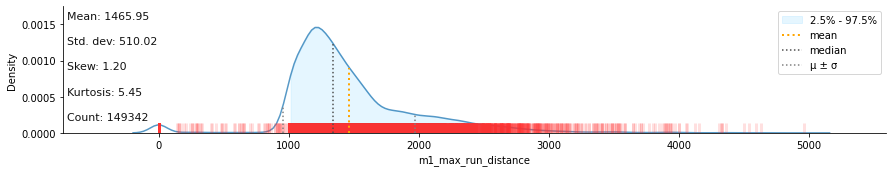

In [28]:
klib.dist_plot(X_train_num['m1_max_run_distance'], showall=True)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='m1_max_run_distance', ylabel='Density'>

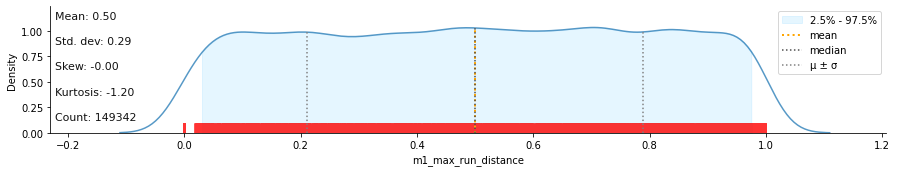

In [29]:
klib.dist_plot(X_train_qtrans_df['m1_max_run_distance'], showall=True)

## Creating Samples to Test our Models:

In order to have an idea about how our models are going to perform, we will test them with samples of our DataFrame. Bear in mind that testing our model with the whole DataFrame would drastically increase the time to perform these checks.

Eventually, due to hardware and time constraints, we decided to work with samples of +3700 rows.

In [30]:
from sklearn.model_selection import train_test_split

#X_sample, _, y_sample , _ = train_test_split(X,y, train_size=0.1, random_state=12)
#X_sample, _, y_sample , _ = train_test_split(X,y, train_size=0.2, random_state=12)
X_sample, _, y_sample , _ = train_test_split(X,y, train_size=0.02, random_state=12)

print(X_sample.shape)

X_sample_train, X_sample_test, y_sample_train, y_sample_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state= 12)

(3733, 70)


In [31]:
X_sample_train_num = X_sample_train.select_dtypes(np.number)
X_sample_test_num = X_sample_test.select_dtypes(np.number)
X_sample_train_cat = X_sample_train.select_dtypes(object)
X_sample_test_cat = X_sample_test.select_dtypes(object)

Creating a list of lists of all the Unique values of the **Categorical Nominal** columns. This way we will make sure that both Train and Test set contain the same range Unique values.

In [32]:
categories = [ list(data[col].unique()) for col in X_sample_train_cat.columns ]

In [35]:
from sklearn.preprocessing import OneHotEncoder

encoder_sample = OneHotEncoder(drop='first', categories = categories)

#X_train:
encoder_sample.fit(X_sample_train_cat) 
X_sample_train_cat_enc = encoder_sample.transform(X_sample_train_cat).toarray()
cols = encoder_sample.get_feature_names_out(input_features=X_sample_train_cat.columns)
X_sample_train_cat_enc_df = pd.DataFrame(X_sample_train_cat_enc, columns=cols, index = X_sample_train_cat.index)
display(X_sample_train_cat_enc_df.head())

#X_test:
X_sample_test_cat_enc = encoder_sample.transform(X_sample_test_cat).toarray()
X_sample_test_cat_enc_df = pd.DataFrame(X_sample_test_cat_enc, columns=cols, index = X_sample_test_cat.index )
display(X_sample_test_cat_enc_df.head())

filename = "encoders/OneHotEncoder_sample.pkl"
pickle.dump(encoder_sample, open(filename, 'wb'))

,m1_mission_id_Mission115,m1_mission_id_Mission109,m1_mission_id_Mission94,m1_mission_id_Mission122,m1_mission_id_Dynamic273,m1_mission_id_Mission19,m1_mission_id_Dynamic105,m1_mission_id_Dynamic86,m1_mission_id_Dynamic290,m1_mission_id_Dynamic82,...,m10_mission_id_Dynamic205,m10_mission_id_Dynamic255,m10_mission_id_Dynamic273,m10_mission_id_Dynamic364,m10_mission_id_Mission72,m10_mission_id_Mission35,m10_mission_id_Dynamic99,m10_mission_id_Dynamic256,m10_mission_id_Dynamic156,m10_mission_id_Dynamic72
171771,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192689,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
269411,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,m1_mission_id_Mission115,m1_mission_id_Mission109,m1_mission_id_Mission94,m1_mission_id_Mission122,m1_mission_id_Dynamic273,m1_mission_id_Mission19,m1_mission_id_Dynamic105,m1_mission_id_Dynamic86,m1_mission_id_Dynamic290,m1_mission_id_Dynamic82,...,m10_mission_id_Dynamic205,m10_mission_id_Dynamic255,m10_mission_id_Dynamic273,m10_mission_id_Dynamic364,m10_mission_id_Mission72,m10_mission_id_Mission35,m10_mission_id_Dynamic99,m10_mission_id_Dynamic256,m10_mission_id_Dynamic156,m10_mission_id_Dynamic72
31251,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
258337,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
224158,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130114,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125469,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
X_sample_train_treated = pd.concat([X_sample_train_cat_enc_df, X_sample_train_num], axis =1)
X_sample_test_treated = pd.concat([X_sample_test_cat_enc_df, X_sample_test_num], axis =1)

In [37]:
from sklearn.preprocessing import QuantileTransformer

X_qtransform_sample = QuantileTransformer()
X_qtransform_sample.fit(X_sample_train_treated.values)
#y_train:
X_train_qtrans_sample = X_qtransform_sample.transform(X_sample_train_treated.values)
X_train_qtrans_sample_df = pd.DataFrame( X_train_qtrans_sample, columns = X_sample_train_treated.columns, index = X_sample_train_treated.index )
display(X_train_qtrans_sample_df.head())

#y_test:
X_test_qtrans_sample = X_qtransform_sample.transform(X_sample_test_treated.values)
X_test_qtrans_sample_df = pd.DataFrame(X_test_qtrans_sample, columns = X_sample_test_treated.columns, index = X_sample_test_treated.index )
display(X_test_qtrans_sample_df.head())

#storing the transformer in a pickle file:
filename = "transformers/X_sample_quantile_transformer.pkl"
pickle.dump(X_qtransform_sample, open(filename, 'wb'))

,m1_mission_id_Mission115,m1_mission_id_Mission109,m1_mission_id_Mission94,m1_mission_id_Mission122,m1_mission_id_Dynamic273,m1_mission_id_Mission19,m1_mission_id_Dynamic105,m1_mission_id_Dynamic86,m1_mission_id_Dynamic290,m1_mission_id_Dynamic82,...,m9_mission_stars_collected,m9_lifetime_played_runs,m9_max_run_distance,m9_total_purchases_virtual,m10_mission_completed,m10_mission_difficulty,m10_mission_stars_collected,m10_lifetime_played_runs,m10_max_run_distance,m10_total_purchases_virtual
171771,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.413914,0.658158,0.678730,0.787788,0.0,0.0,0.473974,0.716717,0.624116,0.800300
192689,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.795796,0.944444,0.039594,0.000000,0.0,0.0,0.893894,0.894895,0.040944,0.000000
269411,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.413914,0.944444,0.497497,0.631131,0.0,1.0,0.052553,0.871371,0.431431,0.533534
223083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.795796,0.599099,0.876537,0.973377,0.0,1.0,0.473974,0.447447,0.845759,0.952452
225556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.795796,0.444945,0.923956,0.000000,0.0,1.0,0.116116,0.258759,0.898340,0.000000


,m1_mission_id_Mission115,m1_mission_id_Mission109,m1_mission_id_Mission94,m1_mission_id_Mission122,m1_mission_id_Dynamic273,m1_mission_id_Mission19,m1_mission_id_Dynamic105,m1_mission_id_Dynamic86,m1_mission_id_Dynamic290,m1_mission_id_Dynamic82,...,m9_mission_stars_collected,m9_lifetime_played_runs,m9_max_run_distance,m9_total_purchases_virtual,m10_mission_completed,m10_mission_difficulty,m10_mission_stars_collected,m10_lifetime_played_runs,m10_max_run_distance,m10_total_purchases_virtual
31251,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.039540,0.140140,0.350453,0.000000,0.0,0.0,0.473974,0.551051,0.727996,0.889389
258337,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.413914,0.829830,0.104905,0.000000,0.0,1.0,0.052553,0.683684,0.077672,0.000000
224158,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.795796,0.599099,0.140826,0.665165,0.0,0.0,0.473974,0.390390,0.106306,0.562563
130114,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.142643,0.239740,0.535536,0.000000,0.0,1.0,0.473974,0.185185,0.467467,0.000000
125469,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.142643,0.239740,0.795687,0.763263,0.0,0.0,0.473974,0.447447,0.753754,0.649650


In [38]:
from sklearn.preprocessing import MinMaxScaler

X_scaler_sample = MinMaxScaler()
X_scaler_sample.fit(X_train_qtrans_sample)
#y_train:
X_train_scaled_sample = X_scaler_sample.transform(X_train_qtrans_sample)
X_train_scaled_sample_df = pd.DataFrame( X_train_scaled_sample, columns = X_train_qtrans_sample_df.columns, index = X_train_qtrans_sample_df.index )
display(X_train_scaled_sample_df.head())

#y_test:
X_test_scaled_sample = X_scaler_sample.transform(X_test_qtrans_sample)
X_test_scaled_sample_df = pd.DataFrame( X_test_scaled_sample, columns = X_test_qtrans_sample_df.columns, index = X_test_qtrans_sample_df.index )
display(X_test_scaled_sample_df.head())

#storing the transformer in a pickle file:
filename = "transformers/X_sample_minmax_scaler.pkl"
pickle.dump(X_scaler_sample, open(filename, 'wb'))

,m1_mission_id_Mission115,m1_mission_id_Mission109,m1_mission_id_Mission94,m1_mission_id_Mission122,m1_mission_id_Dynamic273,m1_mission_id_Mission19,m1_mission_id_Dynamic105,m1_mission_id_Dynamic86,m1_mission_id_Dynamic290,m1_mission_id_Dynamic82,...,m9_mission_stars_collected,m9_lifetime_played_runs,m9_max_run_distance,m9_total_purchases_virtual,m10_mission_completed,m10_mission_difficulty,m10_mission_stars_collected,m10_lifetime_played_runs,m10_max_run_distance,m10_total_purchases_virtual
171771,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.413914,0.658158,0.678730,0.787788,0.0,0.0,0.473974,0.716717,0.624116,0.800300
192689,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.795796,0.944444,0.039594,0.000000,0.0,0.0,0.893894,0.894895,0.040944,0.000000
269411,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.413914,0.944444,0.497497,0.631131,0.0,1.0,0.052553,0.871371,0.431431,0.533534
223083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.795796,0.599099,0.876537,0.973377,0.0,1.0,0.473974,0.447447,0.845759,0.952452
225556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.795796,0.444945,0.923956,0.000000,0.0,1.0,0.116116,0.258759,0.898340,0.000000


,m1_mission_id_Mission115,m1_mission_id_Mission109,m1_mission_id_Mission94,m1_mission_id_Mission122,m1_mission_id_Dynamic273,m1_mission_id_Mission19,m1_mission_id_Dynamic105,m1_mission_id_Dynamic86,m1_mission_id_Dynamic290,m1_mission_id_Dynamic82,...,m9_mission_stars_collected,m9_lifetime_played_runs,m9_max_run_distance,m9_total_purchases_virtual,m10_mission_completed,m10_mission_difficulty,m10_mission_stars_collected,m10_lifetime_played_runs,m10_max_run_distance,m10_total_purchases_virtual
31251,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.039540,0.140140,0.350453,0.000000,0.0,0.0,0.473974,0.551051,0.727996,0.889389
258337,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.413914,0.829830,0.104905,0.000000,0.0,1.0,0.052553,0.683684,0.077672,0.000000
224158,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.795796,0.599099,0.140826,0.665165,0.0,0.0,0.473974,0.390390,0.106306,0.562563
130114,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.142643,0.239740,0.535536,0.000000,0.0,1.0,0.473974,0.185185,0.467467,0.000000
125469,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.142643,0.239740,0.795687,0.763263,0.0,0.0,0.473974,0.447447,0.753754,0.649650


## Choosing the best Regression Model

In order to fulfill our goal, we trained several several models:

- Decision Tree Regressor
- KNeighbors Regressor
- Random Forest Regressor
- Linear Regressor
- Ada Boost Regressor

In order to maximize our results and getting the best parameters, we opted for a **Randomized Search Cross Validation** trying to reduce as much as possible the Negative **Mean Absolute Error** as shown below.

### Defining the Hyperparameter Grids:

In [39]:
#Defining the Randomized Search parameters:

from sklearn.model_selection import RandomizedSearchCV

#Param Grid for Random Forest:

criterion_choices = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
max_depth_choices= [3,4,5,6,7,8,9,10,None] 
min_samples_split_choices = [2,3,4,5,6,7,8,9,10] 
min_samples_leaf_choices = [2,3,4,5,6,7,8,9,10] 
max_features_choices = [2,3,4,5,6]
random_state_choices = [10,20,30,40]

#Storing those parameters in a Dictionary:

param_grid_rf = {'criterion': criterion_choices,
                'max_depth': max_depth_choices,
                'min_samples_split': min_samples_split_choices,
                'min_samples_leaf': min_samples_leaf_choices,
                'max_features': max_features_choices,
                'random_state': random_state_choices}

In [40]:
#Param Grid for KNeighbours:

n_neighbors_choices = [1,2,3,4,5,6,7,8]
algorithm_choices = ['auto','ball_tree', 'kd_tree', 'brute']
leaf_size_choices = [30,40,50,60]
p_choices = [1,2]

param_grid_knn = {'n_neighbors': n_neighbors_choices,
                'algorithm': algorithm_choices,
                'leaf_size': leaf_size_choices,
                'p': p_choices}


In [41]:
#Param Grid for Decission Tree Regressor

max_depth_choices= [3,4,5,6,7,8,9,10,None] 
criterion_choices =  ['squared_error','absolute_error']
min_samples_split_choices = [2,3,4,5,6,7,8,9,10]
min_samples_leaf_choices = [2,3,4,5,6,7,8,9,10]
max_features_choices = [2,3,4,5,6]

param_grid_dt = {  'max_depth': max_depth_choices,
                    'criterion': criterion_choices,
                    'min_samples_split': min_samples_split_choices,
                    'min_samples_leaf': min_samples_leaf_choices,
                    'max_features': max_features_choices}


In [42]:
param_grids = { 'param_grid_rf': {'criterion': criterion_choices,
                                    'max_depth': max_depth_choices,
                                    'min_samples_split': min_samples_split_choices,
                                    'min_samples_leaf': min_samples_leaf_choices,
                                    'max_features': max_features_choices,
                                    'random_state': random_state_choices },
                'param_grid_knn': { 'n_neighbors': n_neighbors_choices,
                                    'algorithm': algorithm_choices,
                                    'leaf_size': leaf_size_choices,
                                    'p': p_choices },
                'param_grid_dt': { 'max_depth': max_depth_choices,
                                    'criterion': criterion_choices,
                                    'min_samples_split': min_samples_split_choices,
                                    'min_samples_leaf': min_samples_leaf_choices,
                                    'max_features': max_features_choices } }

#param_grids

### Defining the models to train with the previously defined Hyperparameter Grids:

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


model1 = RandomForestRegressor()
model2 = KNeighborsRegressor()
model3 = DecisionTreeRegressor()

list_of_models = [(model1,"random_forest"),(model2,"knn"), (model3,"decision_tree")]

### Training 3 Random Forest, KNeigbors and Decission Tree models simultaneously with the best Hyperparameters:

Since the process is very complex and time consuming, we are going to store all our data such as models and metrics in a Dictionary that is going to be filled iteratively with more information as the process moves forward.

Additionally, we are going to store all models in pickle files so we will not have to repeat the process of training them multiple times.

In [44]:
def random_grid_multimodel (list_of_models, random_grids, X_train, X_test, y_train, scoring, folds = 5, iters = 5):
    """
    By providing a list of different models and a dictionary of hyperparameter grids defined per each model,
    it searches for the best model of each kind and trains it.
    The model is selected by using a Randomized CrossValidation Search method. 
    
    """

    best_models = { elem[1]: {'model': None, 'best_params': None, 'Preds_path': None, 'Metrics': None} for elem in list_of_models }

    for i in range( len(list_of_models)):
        if list_of_models[i][1] == "random_forest" :

            random_search_rf = RandomizedSearchCV(estimator = list_of_models[i][0], param_distributions = random_grids['param_grid_rf'],
                                cv=folds, n_iter=iters, n_jobs = 3)

            random_search_rf.fit(X_train, y_train.ravel())

            # make the prediction
            y_pred_train_rf = random_search_rf.predict(X_train)
            y_pred_test_rf  = random_search_rf.predict(X_test)

            print('Random Forest best parameters are:')
            print(random_search_rf.best_params_)

            best_model_rf = random_search_rf.best_estimator_

            filename = "models/" + list_of_models[i][1] + ".pkl"
            with open(filename, "wb") as file:
                pickle.dump(best_model_rf,file)

            best_models["random_forest" ]['model'] = best_model_rf
            best_models["random_forest" ]['best_params'] = random_search_rf.best_params_


        elif list_of_models[i][1] == "knn":

            random_search_knn = RandomizedSearchCV(estimator = list_of_models[i][0], param_distributions = random_grids['param_grid_knn'],
                                cv=folds, n_iter=iters, n_jobs = 3)

            random_search_knn.fit(X_train, y_train.ravel())

            # make the prediction
            y_pred_train_knn = random_search_knn.predict(X_train)
            y_pred_test_knn = random_search_knn.predict(X_test)

            print('KNearest Neighbors best parameters are:')
            print(random_search_knn.best_params_)

            best_model_knn = random_search_knn.best_estimator_

            filename = "models/" + list_of_models[i][1] + ".pkl"
            with open(filename, "wb") as file:
                pickle.dump(best_model_knn,file)

            best_models["knn"]['model'] = best_model_knn
            best_models["knn"]['best_params'] = random_search_knn.best_params_


        elif list_of_models[i][1] == "decision_tree":

            random_search_dt = RandomizedSearchCV(estimator = list_of_models[i][0], param_distributions = random_grids['param_grid_dt'],
                                cv=folds, n_iter=iters, n_jobs = 3)

            random_search_dt.fit(X_train, y_train.ravel())

            # make the prediction
            y_pred_train_dt = random_search_dt.predict(X_train)
            y_pred_test_dt = random_search_dt.predict(X_test)

            print('Decision Tree best parameters are:')
            print(random_search_dt.best_params_)

            best_model_dt = random_search_dt.best_estimator_

            filename = "models/" + list_of_models[i][1] + ".pkl"
            with open(filename, "wb") as file:
                pickle.dump(best_model_dt,file)

            best_models["decision_tree" ]['model'] = best_model_dt
            best_models["decision_tree" ]['best_params'] = random_search_dt.best_params_

    best_models_safe = best_models
    
    filename = "models/best_models.pkl"
    pickle.dump(best_models_safe, open(filename, 'wb'))

    return best_models

In [45]:
best_models_sample = random_grid_multimodel(list_of_models, param_grids, X_train_scaled_sample, X_test_scaled_sample, y_sample_train['target_max_day_played'], 'neg_mean_absolute_error')

Random Forest best parameters are:
{'random_state': 20, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 5, 'max_depth': 4, 'criterion': 'squared_error'}
KNearest Neighbors best parameters are:
{'p': 2, 'n_neighbors': 8, 'leaf_size': 30, 'algorithm': 'brute'}
Decision Tree best parameters are:
{'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 5, 'max_depth': 4, 'criterion': 'squared_error'}


In [46]:
best_models_sample

{'random_forest': {'model': RandomForestRegressor(max_depth=4, max_features=5, min_samples_leaf=7,
                        random_state=20),
  'best_params': {'random_state': 20,
   'min_samples_split': 2,
   'min_samples_leaf': 7,
   'max_features': 5,
   'max_depth': 4,
   'criterion': 'squared_error'},
  'Preds_path': None,
  'Metrics': None},
 'knn': {'model': KNeighborsRegressor(algorithm='brute', n_neighbors=8),
  'best_params': {'p': 2,
   'n_neighbors': 8,
   'leaf_size': 30,
   'algorithm': 'brute'},
  'Preds_path': None,
  'Metrics': None},
 'decision_tree': {'model': DecisionTreeRegressor(max_depth=4, max_features=5, min_samples_leaf=2,
                        min_samples_split=5),
  'best_params': {'min_samples_split': 5,
   'min_samples_leaf': 2,
   'max_features': 5,
   'max_depth': 4,
   'criterion': 'squared_error'},
  'Preds_path': None,
  'Metrics': None}}

### Getting the predictions for the 3 models:

In [47]:
def get_model_predictions(best_models, X_train, y_train, X_test, y_test):

    #Loading the Transformer from the pickle file:

    y_train = np.array(y_train).reshape(-1,1)
    y_test = np.array(y_test).reshape(-1,1)

    for key in list(best_models.keys()):

        preds = pd.DataFrame({'Set': ['Train']*len(X_train) + ['Test']*len(X_test),'Real': y_train.flatten().tolist() + y_test.flatten().tolist()})

        y_pred_train= best_models[key]['model'].predict(X_train).reshape(-1,1)
        y_pred_test = best_models[key]['model'].predict(X_test).reshape(-1,1)

        results = y_pred_train.flatten().tolist() + y_pred_test.flatten().tolist()

        preds[f"y_pred_{key}"] = results

        filename = f"results/{key}.csv"
        preds.to_csv(filename, index = False)
        best_models[key]['Preds_path'] = filename

    return best_models

In [48]:
best_models_sample = get_model_predictions(best_models_sample, X_train_scaled_sample, y_sample_train.values, X_test_scaled_sample, y_sample_test.values)

In [49]:
best_models_sample

{'random_forest': {'model': RandomForestRegressor(max_depth=4, max_features=5, min_samples_leaf=7,
                        random_state=20),
  'best_params': {'random_state': 20,
   'min_samples_split': 2,
   'min_samples_leaf': 7,
   'max_features': 5,
   'max_depth': 4,
   'criterion': 'squared_error'},
  'Preds_path': 'results/random_forest.csv',
  'Metrics': None},
 'knn': {'model': KNeighborsRegressor(algorithm='brute', n_neighbors=8),
  'best_params': {'p': 2,
   'n_neighbors': 8,
   'leaf_size': 30,
   'algorithm': 'brute'},
  'Preds_path': 'results/knn.csv',
  'Metrics': None},
 'decision_tree': {'model': DecisionTreeRegressor(max_depth=4, max_features=5, min_samples_leaf=2,
                        min_samples_split=5),
  'best_params': {'min_samples_split': 5,
   'min_samples_leaf': 2,
   'max_features': 5,
   'max_depth': 4,
   'criterion': 'squared_error'},
  'Preds_path': 'results/decision_tree.csv',
  'Metrics': None}}

### Evaluating the performance of the 3 models:

In [50]:
def eval_models_predictions(best_models):

    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

    for key in list(best_models.keys()):

        metrics = pd.DataFrame({'Error_metric': ['ME','MAE','MSE','RMSE','R2'], 'Train': [0,0,0,0,0], 'Test': [0,0,0,0,0]})

        filename = best_models[key]['Preds_path']
        preds = pd.read_csv(filename)

        real_train  = preds[preds['Set'] == 'Train']['Real']
        pred_train  = preds[preds['Set'] == 'Train'][f"y_pred_{key}"]

        real_test   = preds[preds['Set'] == 'Test']['Real']
        pred_test   = preds[preds['Set'] == 'Test'][f"y_pred_{key}"]

        ME_train  = round(np.mean(real_train - pred_train),2)
        ME_test   = round(np.mean(real_test - pred_test),2)

        MAE_train = round(mean_absolute_error(real_train, pred_train),2)
        MAE_test  = round(mean_absolute_error(real_test, pred_test),2)

        MSE_train = round(mean_squared_error(real_train, pred_train),2)
        MSE_test  = round(mean_squared_error(real_test, pred_test),2)

        RMSE_train = round(np.sqrt(MSE_train),2)
        RMSE_test  = round(np.sqrt(MSE_test),2)

        #MAPE_train = round(np.mean(np.abs(real_train - pred_train)/real_train),2)
        #MAPE_test  = round(np.mean(np.abs(real_test - pred_test)/real_test),2)

        R2_train = round(r2_score(real_train, pred_train),2)
        R2_test  = round(r2_score(real_test, pred_test),2)

        metrics.iloc[0,1] = ME_train
        metrics.iloc[0,2] = ME_test

        metrics.iloc[1,1] = MAE_train
        metrics.iloc[1,2] = MAE_test

        metrics.iloc[2,1] = MSE_train
        metrics.iloc[2,2]  = MSE_test

        metrics.iloc[3,1] = RMSE_train
        metrics.iloc[3,2]  = RMSE_test

        metrics.iloc[4,1] = R2_train
        metrics.iloc[4,2]  = R2_test

        df = metrics.copy()

        del metrics

        best_models[key]['Metrics'] = df

    return best_models



In [51]:
best_models_sample =  eval_models_predictions(best_models_sample)

In [52]:
def lr_perf_plots_multimodel(df_train, df_test, model = None):

    '''
    Provides a scatter plot combined with a lineplot to visually assess
    the performance of your model

    '''

    fig2, ax2 = plt.subplots(2,2, figsize=(16,8))

    sns.scatterplot(data = df_train, y = "y_pred_" + model, x= "Real", ax = ax2[0,0])
    sns.lineplot(data = df_train, x = 'Real', y = 'Real', color = 'black', ax = ax2[0,0])
    sns.histplot(df_train['Real'] - df_train["y_pred_" + model], ax = ax2[0,1])

    sns.scatterplot(data = df_test,y = "y_pred_" + model, x= "Real", ax = ax2[1,0])
    sns.lineplot(data = df_test, x = 'Real', y = 'Real', color = 'black', ax = ax2[1,0])
    sns.histplot(df_test['Real'] - df_test["y_pred_" + model], ax = ax2[1,1])

    plt.show()

#### Error metrics for Random Forest

In [53]:
best_models_sample['random_forest']['Metrics']

,Error_metric,Train,Test
0,ME,0.00,0.01
1,MAE,1.53,1.59
2,MSE,3.21,3.42
3,RMSE,1.79,1.85
4,R2,0.02,0.02


#### Error metrics for KNN

In [54]:
best_models_sample['knn']['Metrics']

,Error_metric,Train,Test
0,ME,0.04,0.11
1,MAE,1.37,1.63
2,MSE,2.73,3.79
3,RMSE,1.65,1.95
4,R2,0.17,-0.09


#### Error metrics for Decision Tree

In [55]:
best_models_sample['decision_tree']['Metrics']

,Error_metric,Train,Test
0,ME,0.00,0.01
1,MAE,1.49,1.54
2,MSE,3.16,3.31
3,RMSE,1.78,1.82
4,R2,0.04,0.05


#### Plotting errors for Random Forest

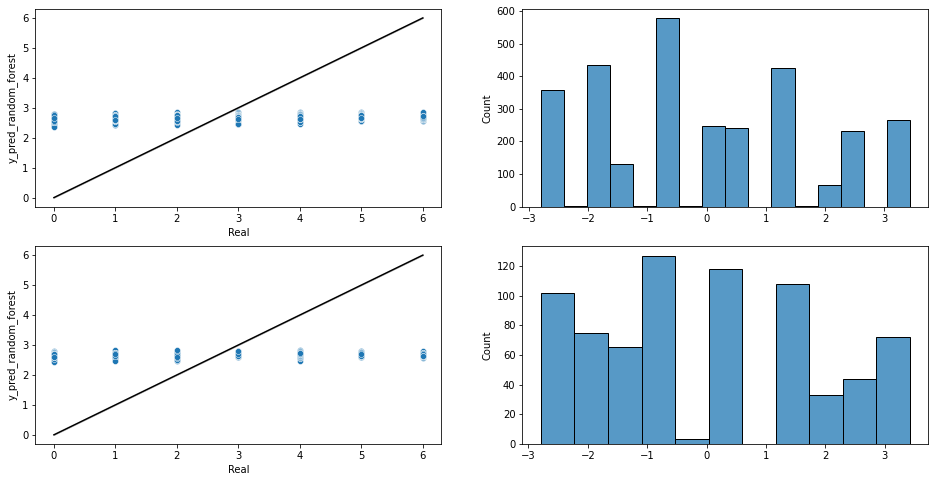

In [56]:
preds = pd.read_csv("results/random_forest.csv")
lr_perf_plots_multimodel(preds[preds['Set'] == 'Train'], preds[preds['Set'] == 'Test'], model = "random_forest")

#### Plotting errors for KNN

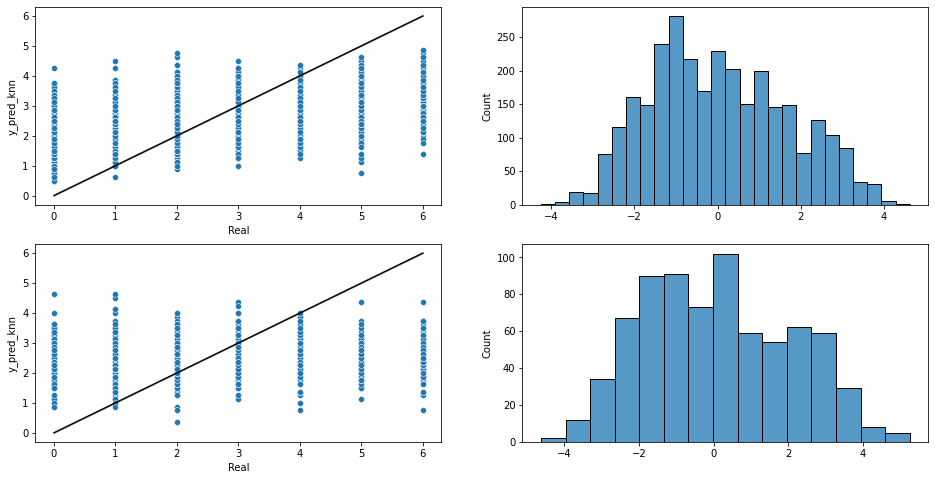

In [57]:
preds = pd.read_csv("results/knn.csv")
lr_perf_plots_multimodel(preds[preds['Set'] == 'Train'], preds[preds['Set'] == 'Test'], model = "knn")

#### Plotting errors for Decision Tree

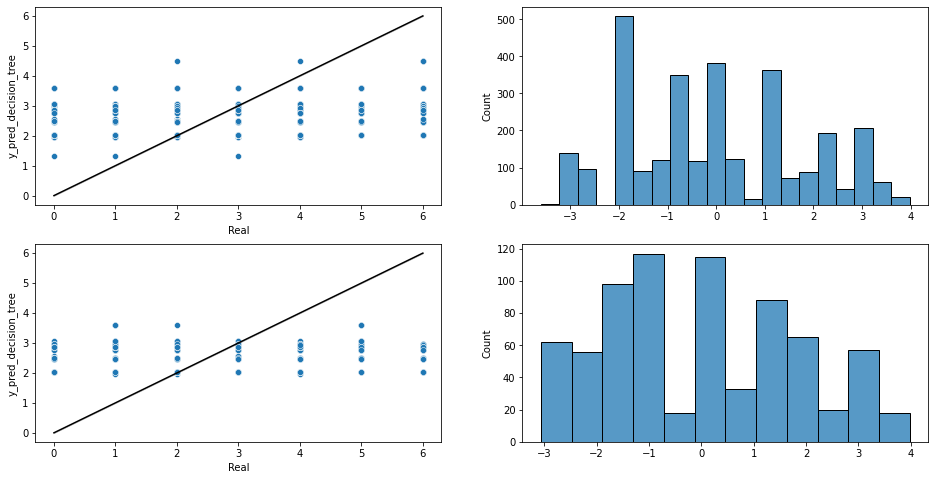

In [58]:
preds = pd.read_csv("results/decision_tree.csv")
lr_perf_plots_multimodel(preds[preds['Set'] == 'Train'], preds[preds['Set'] == 'Test'], model = "decision_tree")

The perfomance of our first 3 models does not seem to be optimal. We can see that the Random Forest and the KNN can somehow predict lower values, but as we move further on the X axis, the performance is not great. Let's try something else:

## Linear Model:

Since the time to train this model is drastically lower to the previous method we decided to use the whole DataFrame to fit it.

### Checking the performance of our Linear Regression model using Cross Validation:

In [59]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

We decided to go for 5 folds and attempted to train our model to reduce as much as possible the **Mean Absolute Error**

In [60]:
from sklearn.model_selection import cross_validate

results = cross_validate(lr,X_train_scaled, y_train.values, cv = 5, scoring = 'neg_mean_absolute_error',return_train_score = True)

In [61]:
print('Train results:\n',results['train_score'])
print('Test results:\n',results['test_score'])
print("The average mean_absolute_error over the folds is: {:.2f}".format(results['test_score'].mean()))

Train results:
 [-1.47270276 -1.46693654 -1.46801498 -1.47127124 -1.46890951]
Test results:
 [-4.79504383e+07 -1.13902573e+09 -1.79493242e+07 -1.61138981e+07
 -8.75542823e+07]
The average mean_absolute_error over the folds is: -261718734.97


The results for the **Linear Regression** model after the **Cross Validation** do not look very promissing, nonetheless, let's test it out and check more deeply its performance:

In [62]:
lr.fit(X_train_scaled, y_train)
y_pred_train_lr = lr.predict(X_train_scaled)
y_pred_test_lr = lr.predict(X_test_scaled)

filename = "models/linear_regression.pkl"
pickle.dump(lr, open(filename, 'wb'))

### Checking the performance of our Linear Regression Model more deeply:

In [63]:
def reg_performance (y_train, y_pred_train, y_test, y_pred_test):
    
    '''
    Measures the performance of a single Regression Model with y transformed.
    '''

    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

    ME_train = round(np.mean(y_train.values - y_pred_train),2)
    ME_test  = round(np.mean(y_test.values - y_pred_test),2)

    MAE_train = round(mean_absolute_error(y_train.values,y_pred_train),2)
    MAE_test  = round(mean_absolute_error(y_test.values,y_pred_test),2)

    MSE_train = round(mean_squared_error(y_train.values,y_pred_train),2)
    MSE_test  = round(mean_squared_error(y_test.values,y_pred_test),2)

    RMSE_train = round(np.sqrt(MSE_train),2)
    RMSE_test  = round(np.sqrt(MSE_test),2)

    MAPE_train = round(np.mean((np.abs(y_train.values-y_pred_train) / y_train.values)* 100.),2)
    MAPE_test  = round(np.mean((np.abs(y_test.values-y_pred_test) / y_test.values)* 100.),2)

    R2_train = round(r2_score(y_train.values,y_pred_train),2)
    R2_test  = round(r2_score(y_test.values,y_pred_test),2)


    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    display(performance)
    
    print('REAL vs PREDICTED PERFORMANCE')
    print('------------------------------')
    #Creating a DataFrame to show differences between predicted and Real values on Train Set:
    df_train = pd.DataFrame()
    df_train['Real_train'] = y_train
    df_train['Pred_train'] = y_pred_train

    #Creating a DataFrame differences between predicted and Real values on Test Set:
    df_test = pd.DataFrame()
    df_test['Real_test'] = y_test
    df_test['Pred_test'] = y_pred_test

    display(df_train.head())
    display(df_test.head())
    
    return performance, df_train, df_test

In [64]:
performance, df_train, df_test = reg_performance (y_train, y_pred_train_lr, y_test, y_pred_test_lr)

,Error_metric,Train,Test
0,Mean error,0.00,-5.462529e+07
1,Mean absolute error,1.47,6.024291e+08
2,Mean squared error,3.07,1.210003e+21
3,Root mean squared error,1.75,3.478510e+10
4,Mean absolute percentual error,inf,inf
5,R2,0.08,-3.623461e+20


REAL vs PREDICTED PERFORMANCE
------------------------------


,Real_train,Pred_train
149640,3,2.325021
180779,3,1.981057
222885,1,2.061553
30197,6,2.068114
228513,4,2.067369


,Real_test,Pred_test
210607,5,3.218390
178806,0,2.404195
4069,5,2.558774
126195,1,2.004889
101950,6,3.033073


In [65]:
def lr_perf_plots(df_train, df_test):

    '''
    Provides a scatter plot combined with a lineplot to visually assess
    the performance of your model

    '''
    
    fig2, ax2 = plt.subplots(2,2, figsize=(16,8))

    sns.scatterplot(y = df_train['Pred_train'], x=df_train['Real_train'], ax = ax2[0,0])
    sns.lineplot(data = df_train, x = 'Real_train', y = 'Real_train', color = 'black', ax = ax2[0,0])
    sns.histplot(df_train['Real_train'] - df_train['Pred_train'], ax = ax2[0,1])

    sns.scatterplot(y = df_test['Pred_test'], x=df_test['Real_test'], ax = ax2[1,0])
    sns.lineplot(data = df_test, x = 'Real_test', y = 'Real_test', color = 'black', ax = ax2[1,0])
    sns.histplot(df_test['Real_test'] - df_test['Pred_test'], ax = ax2[1,1])
    
    plt.show()

python(4569,0x112d30e00) malloc: can't allocate region
:*** mach_vm_map(size=375467062575104, flags: 100) failed (error code=3)
python(4569,0x112d30e00) malloc: *** set a breakpoint in malloc_error_break to debug


MemoryError: Unable to allocate 341. TiB for an array with shape (46933382821418,) and data type float64

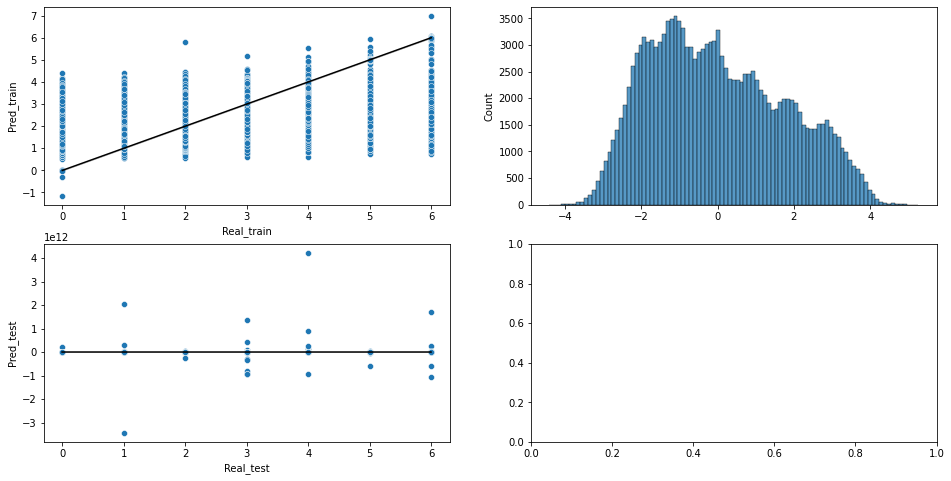

In [66]:
lr_perf_plots(df_train, df_test)

It seems that we ran out of memory to complete the whole computing process. Nonetheless, it seems that the performance isn't optimal anyway.

## Adaboost

We are going to try the **AdaBoost** model first of all with a **Decision Tree** as Base Estimator combined with a **Randomized Search CV** method to get the best Hyperparameters.

This model trains several base estimators sequencially, each time improving the results that the previous estimator got.

In [67]:
from sklearn.ensemble import AdaBoostRegressor

abr = (AdaBoostRegressor(random_state = 1), 'ada_boost_regressor')

### Defining the Hyperparameter grid:

In [68]:
from sklearn.model_selection import GridSearchCV

#Param Grid for AdaBoost:

n_estimators_choices = [10, 50, 100, 500, 1000 , 1500]
loss_choices = ['linear', 'square', 'exponential']

#Storing those parameters in a Dictionary:

param_grid_abr = {'n_estimators': n_estimators_choices,
                 'loss': loss_choices}

### Training the model based on the best Hyperparameters:

In [69]:
def random_search_model_single (model, X_train, y_train, param_distributions, score, iters = 10, folds = 5):
    
    if type(model) == tuple:
        random_search = RandomizedSearchCV(model[0], param_distributions, n_iter= iters, scoring = score, n_jobs=1, refit=True, cv= folds, verbose=2, random_state=1)
        random_search.fit(X_train, y_train.ravel())
        print("Best MAE of %f is using %s" % (random_search.best_score_, random_search.best_params_))

        filename = "models/best_" + model[1]+".pkl"
        with open(filename, "wb") as file:
            pickle.dump(random_search, file)
        
        return random_search
        
    else: 
        random_search = RandomizedSearchCV(model, param_distributions, n_iter= iters, scoring = score, n_jobs=1, refit=True, cv= folds, verbose=2, random_state=1)
        random_search.fit(X_train, y_train.ravel())
        print("Best MAE of %f is using %s" % (random_search.best_score_, random_search.best_params_))

        filename = "models/best_" + model+".pkl"
        with open(filename, "wb") as file:
            pickle.dump(random_search, file)

        return random_search

In [70]:
random_search_abr_single = random_search_model_single(abr, X_train_scaled_sample, y_sample_train.values, param_grid_abr, 'neg_mean_absolute_error')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .......................loss=square, n_estimators=10; total time=  14.7s
[CV] END .......................loss=square, n_estimators=10; total time=  14.4s
[CV] END .......................loss=square, n_estimators=10; total time=  16.8s
[CV] END .......................loss=square, n_estimators=10; total time=  15.8s
[CV] END .......................loss=square, n_estimators=10; total time=  17.6s
[CV] END ......................loss=linear, n_estimators=500; total time=  36.0s
[CV] END ......................loss=linear, n_estimators=500; total time=  46.0s
[CV] END ......................loss=linear, n_estimators=500; total time=  30.8s
[CV] END ......................loss=linear, n_estimators=500; total time=  15.0s
[CV] END ......................loss=linear, n_estimators=500; total time=  32.8s
[CV] END ..................loss=exponential, n_estimators=50; total time= 1.4min
[CV] END ..................loss=exponential, n_e

In [71]:
random_search_abr_single = pickle.load(open('models/best_adaboost.pkl', 'rb'))
best_abr_single = random_search_abr_single.best_estimator_

### Getting the predictions:

In [72]:
y_pred_train_abr = best_abr_single.predict(X_train_scaled_sample_df.values)
y_pred_test_abr = best_abr_single.predict(X_test_scaled_sample_df.values)

### Assessing the performance of our model:

In [73]:
performance_abr, df_train_abr, df_test_abr =  reg_performance (y_sample_train, y_pred_train_abr, y_sample_test, y_pred_test_abr)

,Error_metric,Train,Test
0,Mean error,2.18,2.19
1,Mean absolute error,2.29,2.31
2,Mean squared error,7.98,8.20
3,Root mean squared error,2.82,2.86
4,Mean absolute percentual error,inf,inf
5,R2,-1.44,-1.36


REAL vs PREDICTED PERFORMANCE
------------------------------


,Real_train,Pred_train
171771,1,0.475266
192689,2,0.540284
269411,2,0.518226
223083,4,0.518226
225556,6,0.540284


,Real_test,Pred_test
31251,3,0.537876
258337,3,0.537876
224158,1,0.449453
130114,2,0.488270
125469,1,0.469476


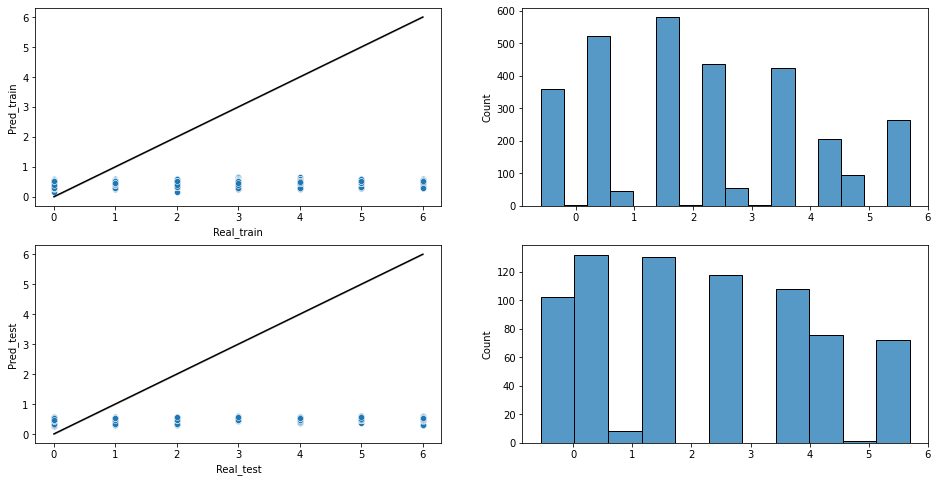

In [74]:
lr_perf_plots(df_train_abr, df_test_abr)

So far, this has been the model that better results has provided, the model seems to slightly be following a linear relation at the beginning of the X and Y axis, overestimating some predictions and underestimating others, nonetheless as soon as we progress on the X axis the model starts underestimating more and more.

## Adaboost with Decision Tree with Randomized Search Hyperparameters:

Let's try to see if we can get better results by repeating the same process, but this time adding the best combination of Hyperparameters we have found previously:

In [75]:
best_models_sample = pickle.load(open('models/best_models.pkl', 'rb'))
best_models_sample

{'random_forest': {'model': RandomForestRegressor(max_depth=4, max_features=5, min_samples_leaf=7,
                        random_state=20),
  'best_params': {'random_state': 20,
   'min_samples_split': 2,
   'min_samples_leaf': 7,
   'max_features': 5,
   'max_depth': 4,
   'criterion': 'squared_error'},
  'Preds_path': None,
  'Metrics': None},
 'knn': {'model': KNeighborsRegressor(algorithm='brute', n_neighbors=8),
  'best_params': {'p': 2,
   'n_neighbors': 8,
   'leaf_size': 30,
   'algorithm': 'brute'},
  'Preds_path': None,
  'Metrics': None},
 'decision_tree': {'model': DecisionTreeRegressor(max_depth=4, max_features=5, min_samples_leaf=2,
                        min_samples_split=5),
  'best_params': {'min_samples_split': 5,
   'min_samples_leaf': 2,
   'max_features': 5,
   'max_depth': 4,
   'criterion': 'squared_error'},
  'Preds_path': None,
  'Metrics': None}}

In [76]:
best_models_sample['random_forest']['best_params']

{'random_state': 20,
 'min_samples_split': 2,
 'min_samples_leaf': 7,
 'max_features': 5,
 'max_depth': 4,
 'criterion': 'squared_error'}

### Getting our model with the Hyperparameters:

In [77]:
abr_dt_hyper = (AdaBoostRegressor(base_estimator = DecisionTreeRegressor(random_state = 30,
 min_samples_split = 5,
 min_samples_leaf = 2,
 max_features = 2,
 max_depth = 10,
 criterion = 'squared_error')),'ada_boost_reg_hyperparams')

### Training the model

In [78]:
random_search_abr_dt_hyper = random_search_model_single(abr_dt_hyper, X_train_qtrans_sample, y_sample_train.values, param_grid_abr, 'neg_mean_absolute_error')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .......................loss=square, n_estimators=10; total time=   0.7s
[CV] END .......................loss=square, n_estimators=10; total time=   0.5s
[CV] END .......................loss=square, n_estimators=10; total time=   0.6s
[CV] END .......................loss=square, n_estimators=10; total time=   0.3s
[CV] END .......................loss=square, n_estimators=10; total time=   0.3s
[CV] END ......................loss=linear, n_estimators=500; total time=   0.5s
[CV] END ......................loss=linear, n_estimators=500; total time=   0.3s
[CV] END ......................loss=linear, n_estimators=500; total time=   0.5s
[CV] END ......................loss=linear, n_estimators=500; total time=   0.1s
[CV] END ......................loss=linear, n_estimators=500; total time=   2.7s
[CV] END ..................loss=exponential, n_estimators=50; total time=   1.3s
[CV] END ..................loss=exponential, n_e

In [79]:
random_search_abr_dt_hyper = pickle.load(open('models/best_ada_boost_reg_hyperparams.pkl', 'rb'))
best_abr_dt_hyper = random_search_abr_dt_hyper.best_estimator_

### Getting the predictions

In [80]:
y_pred_train_abr_dt_hyper = best_abr_dt_hyper.predict(X_train_scaled_sample_df.values)
y_pred_test_abr_dt_hyper = best_abr_dt_hyper.predict(X_test_scaled_sample_df.values)

### Assessing the model performance

In [81]:
performance_abr, df_train_abr_hyper, df_test_abr_hyper =  reg_performance (y_sample_train, y_pred_train_abr_dt_hyper, y_sample_test, y_pred_test_abr_dt_hyper)

,Error_metric,Train,Test
0,Mean error,-0.28,-0.27
1,Mean absolute error,1.50,1.58
2,Mean squared error,3.11,3.45
3,Root mean squared error,1.76,1.86
4,Mean absolute percentual error,inf,inf
5,R2,0.05,0.01


REAL vs PREDICTED PERFORMANCE
------------------------------


,Real_train,Pred_train
171771,1,2.940687
192689,2,2.998644
269411,2,2.933360
223083,4,3.012261
225556,6,3.224886


,Real_test,Pred_test
31251,3,2.933360
258337,3,3.009228
224158,1,3.009228
130114,2,2.855072
125469,1,3.078581


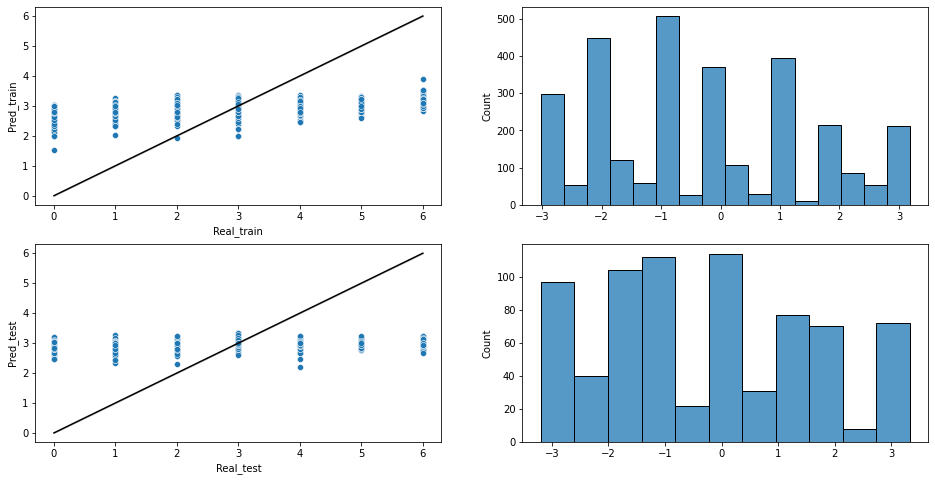

In [82]:
lr_perf_plots(df_train_abr_hyper, df_test_abr_hyper)

Despite the fact of using previously defined best parameters, we got similar results. 

## Adaboost with Linear Regression:

In [102]:
abr_lr = AdaBoostRegressor(lr, n_estimators=50, learning_rate=1.0, loss='linear', random_state=1)
abr_lr.fit(X_train_scaled, y_train)
y_pred_train_abr_lr = abr_lr.predict(X_train_scaled)
y_pred_test_abr_lr = abr_lr.predict(X_test_scaled)

#Storing the model in a pkl file:
pickle.dump(abr_lr, open("models/abr_lr.pkl", 'wb'))

In [104]:
performance_abr_lr, df_train_abr_lr, df_test_abr_lr =  reg_performance (y_train, y_pred_train_abr_lr, y_test, y_pred_test_abr_lr)

,Error_metric,Train,Test
0,Mean error,0.00,-3.690025e+07
1,Mean absolute error,1.47,1.288195e+08
2,Mean squared error,3.07,4.611060e+19
3,Root mean squared error,1.75,6.790479e+09
4,Mean absolute percentual error,inf,inf
5,R2,0.08,-1.380822e+19


REAL vs PREDICTED PERFORMANCE
------------------------------


,Real_train,Pred_train
149640,3,2.330544
180779,3,1.977329
222885,1,2.070027
30197,6,2.073253
228513,4,2.071167


,Real_test,Pred_test
210607,5,3.198326
178806,0,2.377266
4069,5,2.543618
126195,1,2.003577
101950,6,3.054039


MemoryError: Unable to allocate 54.7 TiB for an array with shape (7518396167781,) and data type float64

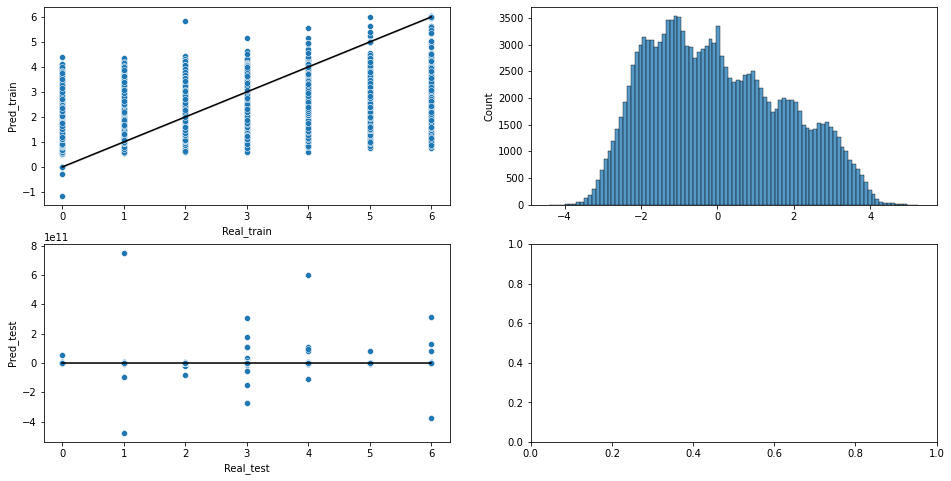

In [105]:
lr_perf_plots(df_train_abr_lr, df_test_abr_lr)

Same results as before,  we could not complete the process on the Test set, but as shown above, the results are not good.

## Implementing a Feed Forward Neural Network

- Load a callback **function** from keras

**Notes:**
Keep training the NN while the error is decreasing.
If the error starts to increase then I will stop training the NN. Because then that's a clear that the model is suffering from overfitting.
The function is called 'EarlyStopping'.


**ModelCheckpoint** save the model even if it's not fully trained.
Because to train a NN takes a lot of time. The coefficients are not fully optimized but at least they are better than the starter coefficients.

- 3.2 Setup the model saving
- 3.3 Defining a function that creates Neural Networks with the given amount of params.
- 3.4 Defining a function that plots the metrics for the Neural Network.

We are going to use a Power Transformer as it seems this is getting the best results.

In [106]:
from sklearn.preprocessing import PowerTransformer

X_ptransform = PowerTransformer()
X_ptransform.fit(X_train_treated.values)
#y_train:
X_train_ptrans = X_ptransform.transform(X_train_treated.values)
X_train_ptrans_df = pd.DataFrame( X_train_ptrans, columns = X_train_treated.columns, index = X_train_treated.index )
display(X_train_ptrans_df.head())

#y_test:
X_test_ptrans = X_ptransform.transform(X_test_treated.values)
X_test_ptrans_df = pd.DataFrame(X_test_ptrans, columns = X_test_treated.columns, index = X_test_treated.index )
display(X_test_ptrans_df.head())

#storing the transformer in a pickle file:
filename = "transformers/X_power_transformer.pkl"
pickle.dump(X_ptransform, open(filename, 'wb'))

,m1_mission_id_Mission115,m1_mission_id_Mission109,m1_mission_id_Mission94,m1_mission_id_Mission122,m1_mission_id_Dynamic273,m1_mission_id_Mission19,m1_mission_id_Dynamic105,m1_mission_id_Dynamic86,m1_mission_id_Dynamic290,m1_mission_id_Dynamic82,...,m9_mission_stars_collected,m9_lifetime_played_runs,m9_max_run_distance,m9_total_purchases_virtual,m10_mission_completed,m10_mission_difficulty,m10_mission_stars_collected,m10_lifetime_played_runs,m10_max_run_distance,m10_total_purchases_virtual
149640,0.781336,-0.200472,-0.208224,-0.040785,0.0,0.0,-0.002588,-0.004482,-0.002588,-0.00366,...,-2.203507,-1.359574,0.049079,-1.303268,0.0,1.001756,0.060992,-1.316310,-0.109811,-1.444936
180779,0.781336,-0.200472,-0.208224,-0.040785,0.0,0.0,-0.002588,-0.004482,-0.002588,-0.00366,...,0.880692,-0.647990,-0.319736,-1.303268,0.0,-0.998247,-1.032864,-1.047435,-0.481900,-1.444936
222885,0.781336,-0.200472,-0.208224,-0.040785,0.0,0.0,-0.002588,-0.004482,-0.002588,-0.00366,...,-0.085672,-0.967480,0.710574,-1.303268,0.0,1.001756,0.060992,-1.047435,0.560438,-1.444936
30197,0.781336,-0.200472,-0.208224,-0.040785,0.0,0.0,-0.002588,-0.004482,-0.002588,-0.00366,...,-0.085672,-0.647990,-0.224411,-1.303268,0.0,1.001756,0.060992,-0.816201,-0.385837,-1.444936
228513,-1.279859,-0.200472,-0.208224,-0.040785,0.0,0.0,-0.002588,-0.004482,-0.002588,-0.00366,...,-1.110757,-0.967480,-0.295546,0.283655,0.0,1.001756,0.060992,-1.047435,-0.457530,0.058416


,m1_mission_id_Mission115,m1_mission_id_Mission109,m1_mission_id_Mission94,m1_mission_id_Mission122,m1_mission_id_Dynamic273,m1_mission_id_Mission19,m1_mission_id_Dynamic105,m1_mission_id_Dynamic86,m1_mission_id_Dynamic290,m1_mission_id_Dynamic82,...,m9_mission_stars_collected,m9_lifetime_played_runs,m9_max_run_distance,m9_total_purchases_virtual,m10_mission_completed,m10_mission_difficulty,m10_mission_stars_collected,m10_lifetime_played_runs,m10_max_run_distance,m10_total_purchases_virtual
210607,0.781336,-0.200472,-0.208224,-0.040785,0.0,0.0,-0.002588,-0.004482,-0.002588,-0.00366,...,-0.085672,0.387884,-1.507130,-1.303268,0.0,-0.998247,0.060992,0.359507,0.325838,0.364107
178806,0.781336,-0.200472,-0.208224,-0.040785,0.0,0.0,-0.002588,-0.004482,-0.002588,-0.00366,...,-0.085672,-0.967480,2.074969,-1.303268,0.0,1.001756,-2.189021,-1.316310,1.955317,-1.444936
4069,-1.279859,-0.200472,-0.208224,-0.040785,0.0,0.0,-0.002588,-0.004482,-0.002588,-0.00366,...,0.880692,-0.379835,1.444244,-1.303268,0.0,1.001756,-1.032864,-0.816201,1.308341,-1.444936
126195,0.781336,-0.200472,-0.208224,-0.040785,0.0,0.0,-0.002588,-0.004482,-0.002588,-0.00366,...,0.880692,-0.149740,-1.246573,0.283655,0.0,-0.998247,1.099740,-0.433232,-1.412129,0.058416
101950,-1.279859,-0.200472,-0.208224,-0.040785,0.0,0.0,-0.002588,-0.004482,-0.002588,-0.00366,...,-0.085672,1.732841,0.383269,0.365918,0.0,1.001756,0.060992,1.279312,0.228331,0.144782


In [107]:
X_ptransform = pickle.load(open('transformers/X_power_transformer.pkl', 'rb'))

X_train_ptrans = X_ptransform.transform(X_train_treated.values)
X_train_ptrans_df = pd.DataFrame( X_train_ptrans, columns = X_train_treated.columns, index = X_train_treated.index )

X_test_ptrans = X_ptransform.transform(X_test_treated.values)
X_test_ptrans_df = pd.DataFrame(X_test_ptrans, columns = X_test_treated.columns, index = X_test_treated.index )

### Loading callback functions from keras:

In [108]:
from tensorflow.keras.callbacks import EarlyStopping # This callback allows you to stop the training if the validation error increases
from tensorflow.keras.callbacks import ModelCheckpoint # This callback allows you to save the model even if the model hasn't been fully trained

### Set up the model saving

In [109]:
early_stopping = EarlyStopping(patience=5) 

In [110]:
checkpoint_path = 'gaming_project.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path, # Where to save the checkpoint.
    save_freq='epoch', # How often the checkpoint file will be saved.
    save_weights_only=False, # Wether or not save only the weitgths of each neuron.
    verbose=1 # To display the progress
)

### Defining a function that creates a Neural Network with the given amount of layers, neurons, activations, dropouts and regularizers.

In [111]:
def create_reg_nn_model(inputs,layer_list= [972,32,8,3,1],
                 activations = ['relu','relu','relu','relu','relu'],
                 dropouts = [0.5,0,0,0,0]):
                 #regularizers = [('l1',0.01),('l2',0.01)]):
    '''
    This function creates a neural network with the given amount of layers, neurons,
    activations, dropouts and regularizers.
    Inputs: 
    inputs -> input size. It must be integer
    activations -> a list of activation functions to be used in each layer
    droputs -> a list of dropouts coefficients to be used in each layer except the last one
    regularizers -> a list of regularizers to be used in the last layer. Coefficients should
    be set to zero if no regularizers are wanted.
    Output:
    neural network already compiled with: 'adam' optimizer and 'mse' as the loss.
    '''
    
    model = keras.Sequential()

    my_list = list(zip(layer_list,activations,dropouts)) # List of tuples with [(neurons1,activation1,dropout1),(neurons2,activation2,dropout2),..]

    for index, elem in enumerate(my_list):
        if ( index == 0 ):      
            model.add(Dense(units = elem[0],input_dim = inputs,activation=elem[1]))
            if ( elem[2] != 0 ):
            # Adding a dropout layer with regularization parameter (it must be between [0,1) )
                model.add(Dropout(elem[2]))
        else:
            model.add(Dense(units = elem[0],activation=elem[1]))
            if ( elem[2] != 0 ):
                model.add(Dropout(elem[2]))

        if ( index == len(my_list) ):
            model.add(Dense(units = elem[0], activation=elem[1],
                            activity_regularizer=
                            regularizers.l1_l2(l1=regularizers[0][1], l2=regularizers[1][1])))

    # Compile the final network
    model.compile(optimizer='adam', # Optimization method
              loss='mse', # Error metric to minimize
              metrics=['mae', 'mse','mape'] # Error matrics to report
              )

    model.summary()

    return model

### Defining a function that plots the metrics for the Neural Network

In [112]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.yscale('log')
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

### Define, fit and plot de metrics for a given Neural Network
- 4.1 Model 1
- 4.2 Model 2

### Model 1:

In [113]:
model1 = create_reg_nn_model(X_train_ptrans_df.shape[1],dropouts = [0.5,0,0,0,0])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 972)               945756    
                                                                 
 dropout (Dropout)           (None, 972)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                31136     
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 3)                 27        
                                                                 
 dense_4 (Dense)             (None, 1)                 4         
                                                                 
Total params: 977,187
Trainable params: 977,187
Non-trai

In [114]:
model1 = model1.fit(
    X_train_ptrans, 
    y_train.values, 
    epochs=30, # Number of epochs. 
    validation_split=0.20, # Here the TRAIN set will be split in TRAIN = TRAIN_NEW + VALIDATION. TRAIN_NEW used for train and val for CV
    batch_size=20, # How many samples to input in the network before updating the weights
    verbose=2, # To display the progress.
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/30

Epoch 1: saving model to gaming_project.hdf5
5974/5974 - 26s - loss: 3.2621 - mae: 1.5012 - mse: 3.2621 - mape: 288860768.0000 - val_loss: 3.1605 - val_mae: 1.4807 - val_mse: 3.1605 - val_mape: 277372576.0000 - 26s/epoch - 4ms/step
Epoch 2/30

Epoch 2: saving model to gaming_project.hdf5
5974/5974 - 28s - loss: 3.1279 - mae: 1.4844 - mse: 3.1279 - mape: 291021056.0000 - val_loss: 3.0965 - val_mae: 1.4853 - val_mse: 3.0965 - val_mape: 305478400.0000 - 28s/epoch - 5ms/step
Epoch 3/30

Epoch 3: saving model to gaming_project.hdf5
5974/5974 - 29s - loss: 3.1014 - mae: 1.4809 - mse: 3.1014 - mape: 293483648.0000 - val_loss: 3.1141 - val_mae: 1.4825 - val_mse: 3.1141 - val_mape: 289805376.0000 - 29s/epoch - 5ms/step
Epoch 4/30

Epoch 4: saving model to gaming_project.hdf5
5974/5974 - 25s - loss: 3.0901 - mae: 1.4787 - mse: 3.0901 - mape: 292558656.0000 - val_loss: 3.0950 - val_mae: 1.4836 - val_mse: 3.0950 - val_mape: 301211584.0000 - 25s/epoch - 4ms/step
Epoch 5/30

Epoch 5: sav

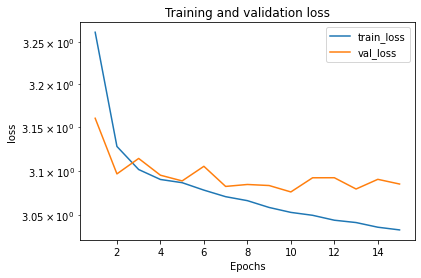

In [115]:
plot_metric(model1,'loss')

We can see that there is a convergence on Train and validation loss on the third epoch. Which tells us that our model does not suffer from overfitting after that, it seems that our model is better fitting new data than training data.

### Model 2:

In [116]:
model2 = create_reg_nn_model(X_train_ptrans.shape[1],dropouts = [0.7,0.5,0.2,0.1,0])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 972)               945756    
                                                                 
 dropout_1 (Dropout)         (None, 972)               0         
                                                                 
 dense_6 (Dense)             (None, 32)                31136     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 8)                 264       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_8 (Dense)             (None, 3)                

In [117]:
model2 = model2.fit(
    X_train_ptrans, 
    y_train.values, 
    epochs=30, # Number of epochs. 
    validation_split=0.20, # Here the TRAIN set will be split in TRAIN = TRAIN_NEW + VALIDATION. TRAIN_NEW used for train and val for CV
    batch_size=20, # How many samples to input in the network before updating the weights
    verbose=2, # To display the progress.
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/30

Epoch 1: saving model to gaming_project.hdf5
5974/5974 - 29s - loss: 3.7515 - mae: 1.5779 - mse: 3.7515 - mape: 280249408.0000 - val_loss: 3.1851 - val_mae: 1.5105 - val_mse: 3.1851 - val_mape: 308444416.0000 - 29s/epoch - 5ms/step
Epoch 2/30

Epoch 2: saving model to gaming_project.hdf5
5974/5974 - 28s - loss: 3.2209 - mae: 1.5148 - mse: 3.2209 - mape: 311682784.0000 - val_loss: 3.1594 - val_mae: 1.5056 - val_mse: 3.1594 - val_mape: 313975168.0000 - 28s/epoch - 5ms/step
Epoch 3/30

Epoch 3: saving model to gaming_project.hdf5
5974/5974 - 29s - loss: 3.1957 - mae: 1.5129 - mse: 3.1957 - mape: 312882496.0000 - val_loss: 3.1877 - val_mae: 1.5143 - val_mse: 3.1877 - val_mape: 313354944.0000 - 29s/epoch - 5ms/step
Epoch 4/30

Epoch 4: saving model to gaming_project.hdf5
5974/5974 - 27s - loss: 3.1961 - mae: 1.5128 - mse: 3.1961 - mape: 312727072.0000 - val_loss: 3.1633 - val_mae: 1.5094 - val_mse: 3.1633 - val_mape: 317128576.0000 - 27s/epoch - 4ms/step
Epoch 5/30

Epoch 5: sav

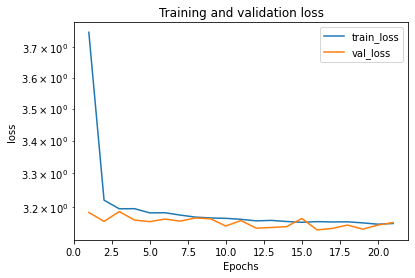

In [118]:
plot_metric(model2,'loss')

On this second model the training loss seems to be more steep and there is a convergence as well between Train and Validation loss before the third Epoch. After that we can see that our model performs very similarly fitting training and new data. 